In [1]:
#load module
from FedDifPrivModels.FedPGMDataset import FedPGMDataset
from FedDifPrivModels.FedDataset import FedDataset
from FedDifPrivModels.FedAllInOnePGM import FedAllInOnePGM
from FedDifPrivModels.FedAdapIterPGM import FedAdapIterPGM
from FedDifPrivModels.Evaluation import Evaluation
from FedDifPrivModels.Utils import FL_split_data, mu_from_eps_delta, eps_from_mu_delta, get_FL_datasets
from mbi import domain, Dataset
import numpy as np
import pandas as pd
import pickle as pk

C:\Users\erkjrv\Anaconda3\lib\site-packages\mbi\__init__.py:15: UserWarning: MixtureInference disabled, please install jax and jaxlib
  warnings.warn('MixtureInference disabled, please install jax and jaxlib')


In [2]:
#set seed
iSeed = 1234
rng = np.random.default_rng(iSeed)

In [3]:
#load data
sRef = f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/pickle_data/adult.pickle"
sSetting = "homogeneous_equalsize"
llClientTrainDataRaw, llClientTestDataRaw, lTotalTrainData, lTotalTestData,  diMapper, lDataTypes, sYname, diMinMaxInfo, delimiterInfo, diCatUniqueValuesInfo = get_FL_datasets(sRef=sRef, sSetting = sSetting, dTrainFrac = 0.75, iRep = 10, iSeed = iSeed)

#load fedDatasets
with open('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/models/lFedDatasets.pickle', 'rb') as handle:
    lFedDatasets = pk.load(handle)

#load models
sRef = f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/models/homogeneous_equalsize_PGM_FTST_noCorrBins_defaultScore_maxDegree2_adult.pickle"
with open(sRef, 'rb') as handle:
    diModelsFTST = pk.load(handle)
sRef = f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/models/homogeneous_equalsize_PGM_FIST_noCorrBins_defaultScore_maxDegree3_adult.pickle"
with open(sRef, 'rb') as handle:
    diModelsFIST = pk.load(handle)
sRef = f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/models/homogeneous_equalsize_GAN_withMode_NA_noScaffold_NA_adult.pickle"
with open(sRef, 'rb') as handle:
    diModelsGAN = pk.load(handle)
sRef = f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/models/homogeneous_equalsize_PGM_FIST_corrBins_defaultScore_maxDegree3_adult.pickle"
with open(sRef, 'rb') as handle:
    diModelsFISTCorr = pk.load(handle)
sRef = f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/models/lFedDatasets.pickle"
with open(sRef, 'rb') as handle:
    lFedDatasets = pk.load(handle)

In [9]:
diModelsGAN[(0, 0.05)].fedGANDataset.dtypes = lTotalTrainData[0].dtypes
diModelsGAN[(0, 2.5)].fedGANDataset.dtypes = lTotalTrainData[0].dtypes

In [10]:
#generate datasets
diDatasets = dict()
diDatasets[(0.1,"FTST")] = FedDataset.transform_to_original_space(diModelsFTST[(0, 0.05)].synthetic_data(rows = 10000).df, lDataTypes, diBins = lFedDatasets[0].diBins, diDefaultBins = lFedDatasets[0].diBins, delimiterInfo = delimiterInfo, rng = rng) 
diDatasets[(1.0,"FTST")] = FedDataset.transform_to_original_space(diModelsFTST[(0, 2.5)].synthetic_data(rows = 10000).df, lDataTypes, diBins = lFedDatasets[0].diBins, diDefaultBins = lFedDatasets[0].diBins, delimiterInfo = delimiterInfo, rng = rng) 
diDatasets[(0.1,"FIST")] = FedDataset.transform_to_original_space(diModelsFIST[(0, 0.05)].synthetic_data(rows = 10000).df, lDataTypes, diBins = lFedDatasets[0].diBins, diDefaultBins = lFedDatasets[0].diBins, delimiterInfo = delimiterInfo, rng = rng) 
diDatasets[(1.0,"FIST")] = FedDataset.transform_to_original_space(diModelsFIST[(0, 2.5)].synthetic_data(rows = 10000).df, lDataTypes, diBins = lFedDatasets[0].diBins, diDefaultBins = lFedDatasets[0].diBins, delimiterInfo = delimiterInfo, rng = rng) 
diDatasets[(0.1,"FISTCorr")] = FedDataset.transform_to_original_space(diModelsFISTCorr[(0, 0.05)].synthetic_data(rows = 10000).df, lDataTypes, diBins = lFedDatasets[0].diBins, diDefaultBins = lFedDatasets[0].diBins, delimiterInfo = delimiterInfo, rng = rng)  
diDatasets[(1.0,"FISTCorr")] = FedDataset.transform_to_original_space(diModelsFISTCorr[(0, 2.5)].synthetic_data(rows = 10000).df, lDataTypes, diBins = lFedDatasets[0].diBins, diDefaultBins = lFedDatasets[0].diBins, delimiterInfo = delimiterInfo, rng = rng)  
#diModelsGAN[(0, 0.05)].globalGenerator.to("cuda") 
#diModelsGAN[(0, 2.5)].globalGenerator.to("cuda") 
diDatasets[(0.1,"GAN")] = diModelsGAN[(0, 0.05)].synthetic_data(iRows = 10000, device = "cpu")
diDatasets[(1.0,"GAN")] = diModelsGAN[(0, 2.5)].synthetic_data(iRows = 10000, device = "cpu")

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['axes.facecolor']='w'
plt.rc('axes',edgecolor='grey')
plt.rcParams.update({"axes.grid" : True, "grid.color": "whitesmoke"})
plt.rc('legend',fontsize=8)


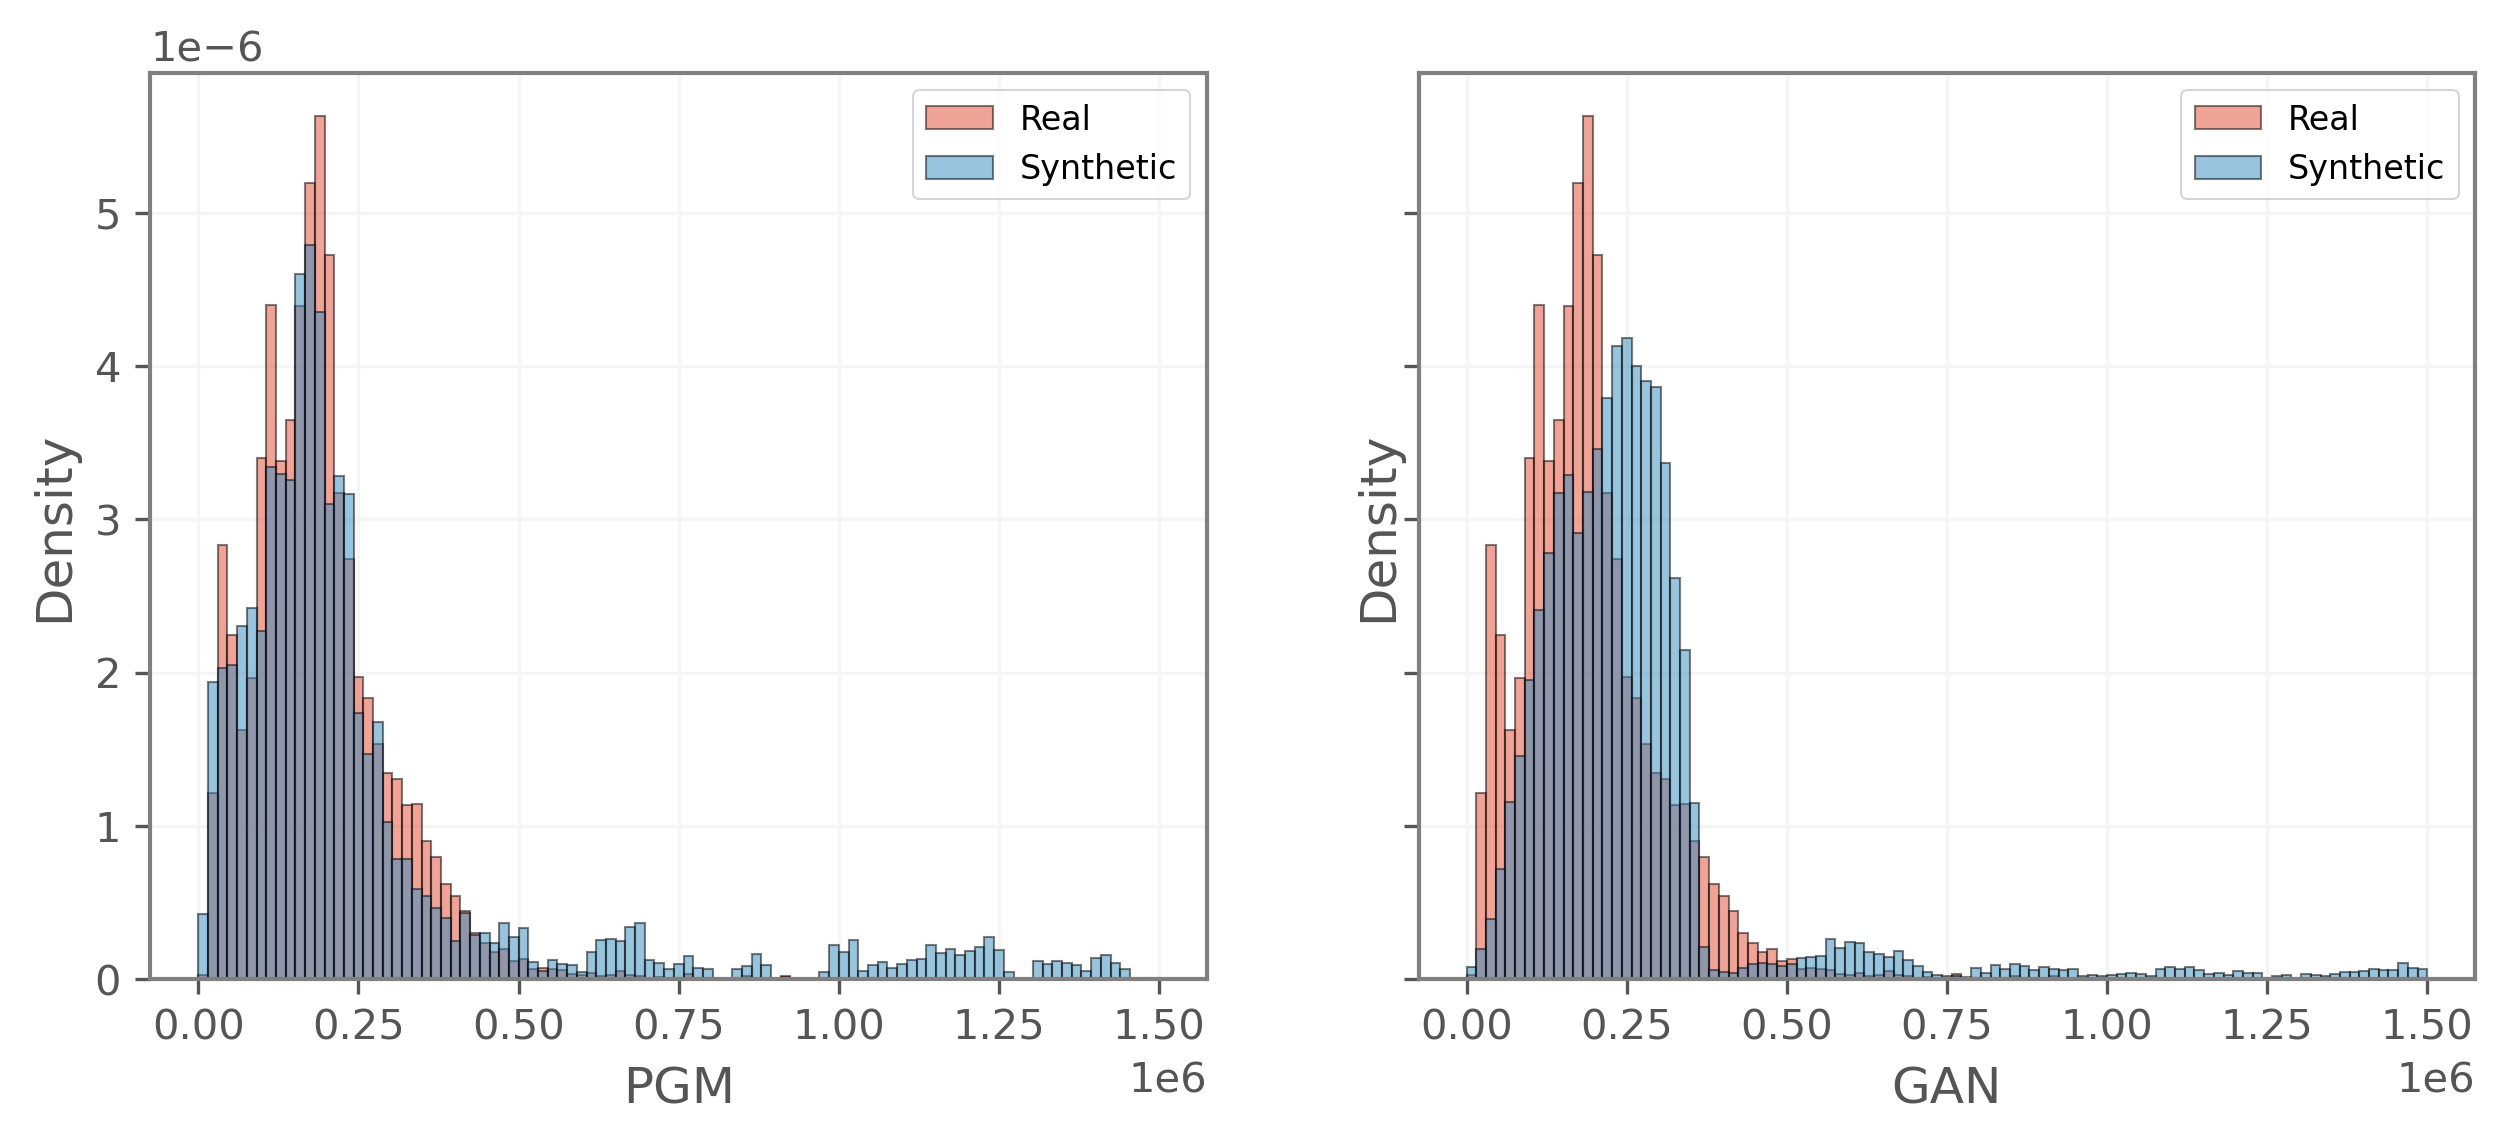

In [12]:
#variable
sColumn = 'fnlwgt'

#subplots
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (10,4), dpi = 300)
ax1, ax2 = axes.flatten()


#set y, bins
y = lTotalTestData[0][sColumn].values
bins = np.linspace(0, 1500000, 100)

#first image
z1 = diDatasets[(0.1,"FTST")][sColumn].values
ax1.hist(y, bins, alpha = 0.5, density = True, label = "Real", ec='black')
ax1.hist(z1, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax1.legend(loc='upper right')
ax1.set_xlabel('PGM')
ax1.set_ylabel("Density")

#second image
z2 = diDatasets[(0.1,"GAN")][sColumn].values
ax2.hist(y, bins, alpha = 0.5, density = True, label = "Real", ec='black')
ax2.hist(z2, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax2.legend(loc='upper right')
ax2.set_xlabel('GAN')
ax2.set_ylabel("Density")

plt.show()

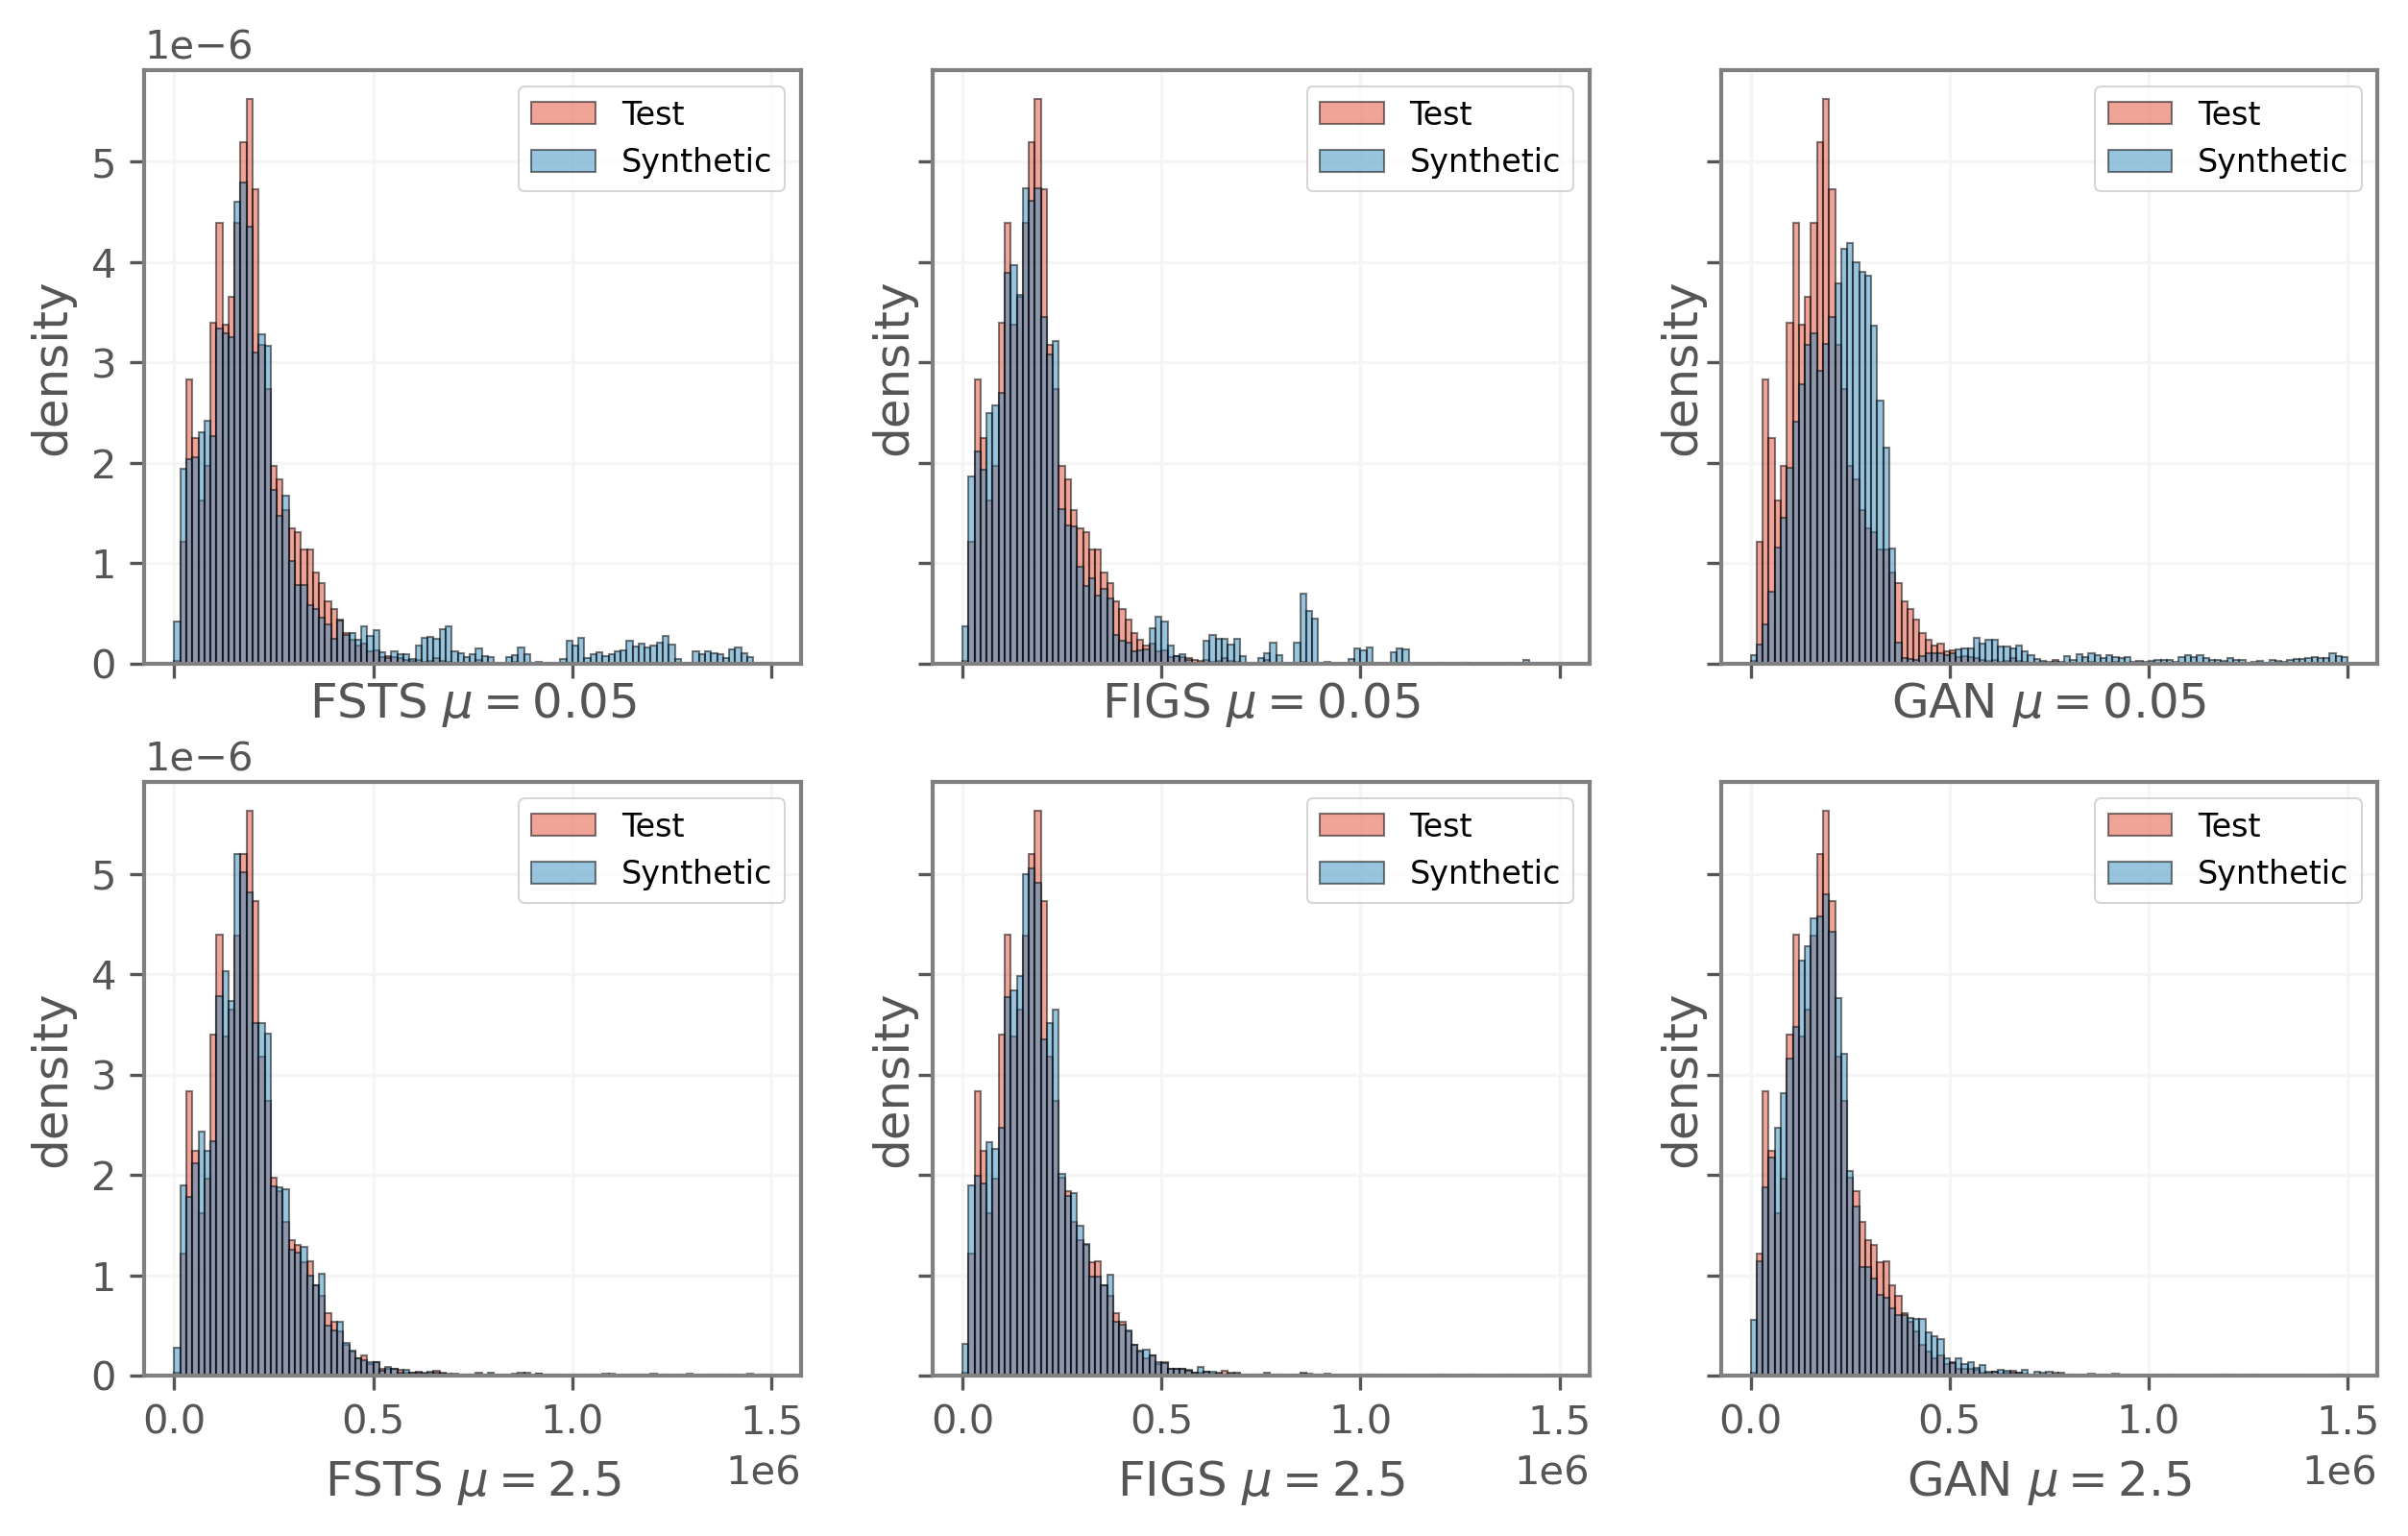

In [13]:
#variable
sColumn = 'fnlwgt'

#subplots
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize = (10,6), dpi = 300)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()


#set y, bins
y = lTotalTestData[0][sColumn].values
bins = np.linspace(0, 1500000, 100)

#first image
z1 = diDatasets[(0.1,"FTST")][sColumn].values
ax1.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax1.hist(z1, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax1.legend(loc='upper right')
ax1.set_xlabel('FSTS $\mu = 0.05$')
ax1.set_ylabel("density")

#second image
z2 = diDatasets[(0.1,"FIST")][sColumn].values
ax2.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax2.hist(z2, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax2.legend(loc='upper right')
ax2.set_xlabel('FIGS $\mu = 0.05$')
ax2.set_ylabel("density")

#third image
z3 = diDatasets[(0.1,"GAN")][sColumn].values
ax3.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax3.hist(z3, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax3.legend(loc='upper right')
ax3.set_xlabel('GAN $\mu = 0.05$')
ax3.set_ylabel("density")

#fourth
z4 = diDatasets[(1.0,"FTST")][sColumn].values
ax4.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax4.hist(z4, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax4.legend(loc='upper right')
ax4.set_xlabel('FSTS $\mu = 2.5$')
ax4.set_ylabel("density")

#fifth image
z5 = diDatasets[(1.0,"FIST")][sColumn].values
ax5.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax5.hist(z5, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax5.legend(loc='upper right')
ax5.set_xlabel('FIGS $\mu = 2.5$')
ax5.set_ylabel("density")

#last image
z6 = diDatasets[(1.0,"GAN")][sColumn].values
ax6.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax6.hist(z6, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax6.legend(loc='upper right')
ax6.set_xlabel('GAN $\mu = 2.5$')
ax6.set_ylabel("density")


#plt.show()
plt.savefig('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/figures/fnlwgtRes.pdf', bbox_inches='tight')

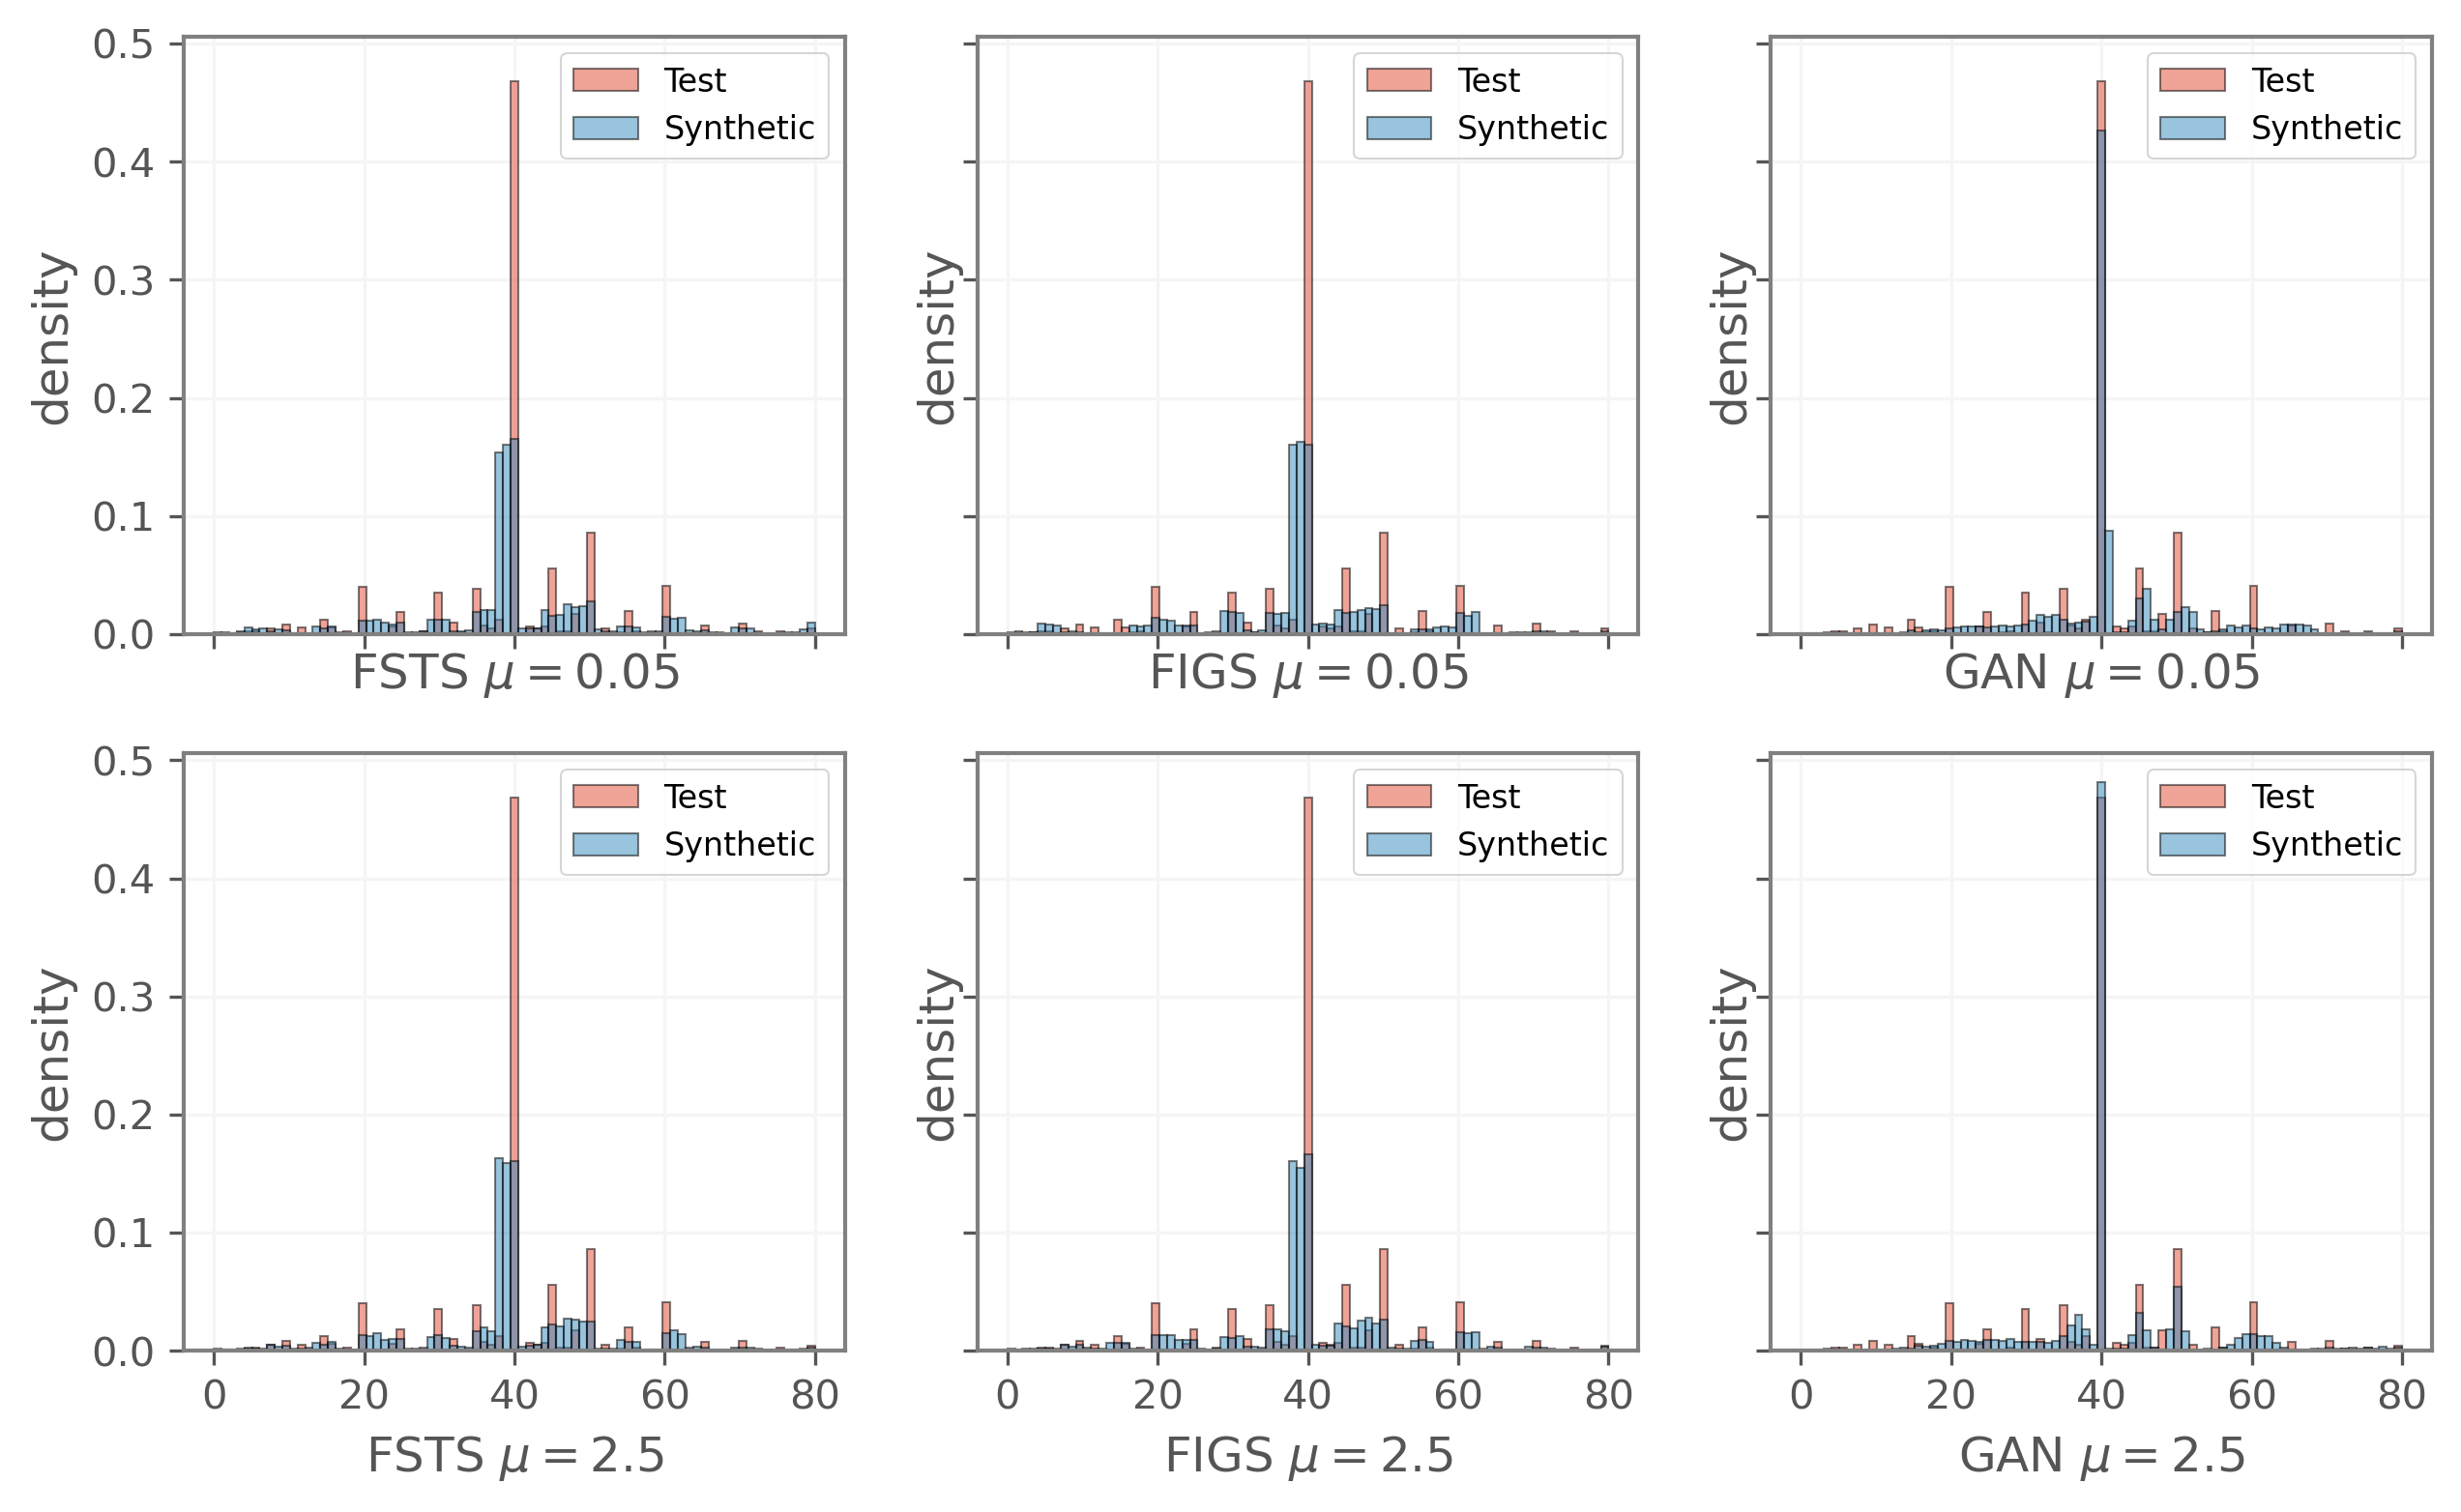

In [14]:
#variable
sColumn = 'hours-per-week'

#subplots
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize = (10,6), dpi = 300)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

#set y, bins
y = lTotalTestData[0][sColumn].values
bins = np.linspace(0, 80, 80)

#first image
z1 = diDatasets[(0.1,"FTST")][sColumn].values
ax1.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax1.hist(z1, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax1.legend(loc='upper right')
ax1.set_xlabel('FSTS $\mu = 0.05$')
ax1.set_ylabel("density")

#second image
z2 = diDatasets[(0.1,"FIST")][sColumn].values
ax2.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax2.hist(z2, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax2.legend(loc='upper right')
ax2.set_xlabel('FIGS $\mu = 0.05$')
ax2.set_ylabel("density")

#third image
z3 = diDatasets[(0.1,"GAN")][sColumn].values
ax3.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax3.hist(z3, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax3.legend(loc='upper right')
ax3.set_xlabel('GAN $\mu = 0.05$')
ax3.set_ylabel("density")

#fourth
z4 = diDatasets[(1.0,"FTST")][sColumn].values
ax4.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax4.hist(z4, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax4.legend(loc='upper right')
ax4.set_xlabel('FSTS $\mu = 2.5$')
ax4.set_ylabel("density")

#fifth image
z5 = diDatasets[(1.0,"FIST")][sColumn].values
ax5.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax5.hist(z5, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax5.legend(loc='upper right')
ax5.set_xlabel('FIGS $\mu = 2.5$')
ax5.set_ylabel("density")

#last image
z6 = diDatasets[(1.0,"GAN")][sColumn].values
ax6.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax6.hist(z6, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax6.legend(loc='upper right')
ax6.set_xlabel('GAN $\mu = 2.5$')
ax6.set_ylabel("density")

plt.savefig('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/figures/hoursperweekRes.pdf', bbox_inches='tight')
#plt.show()

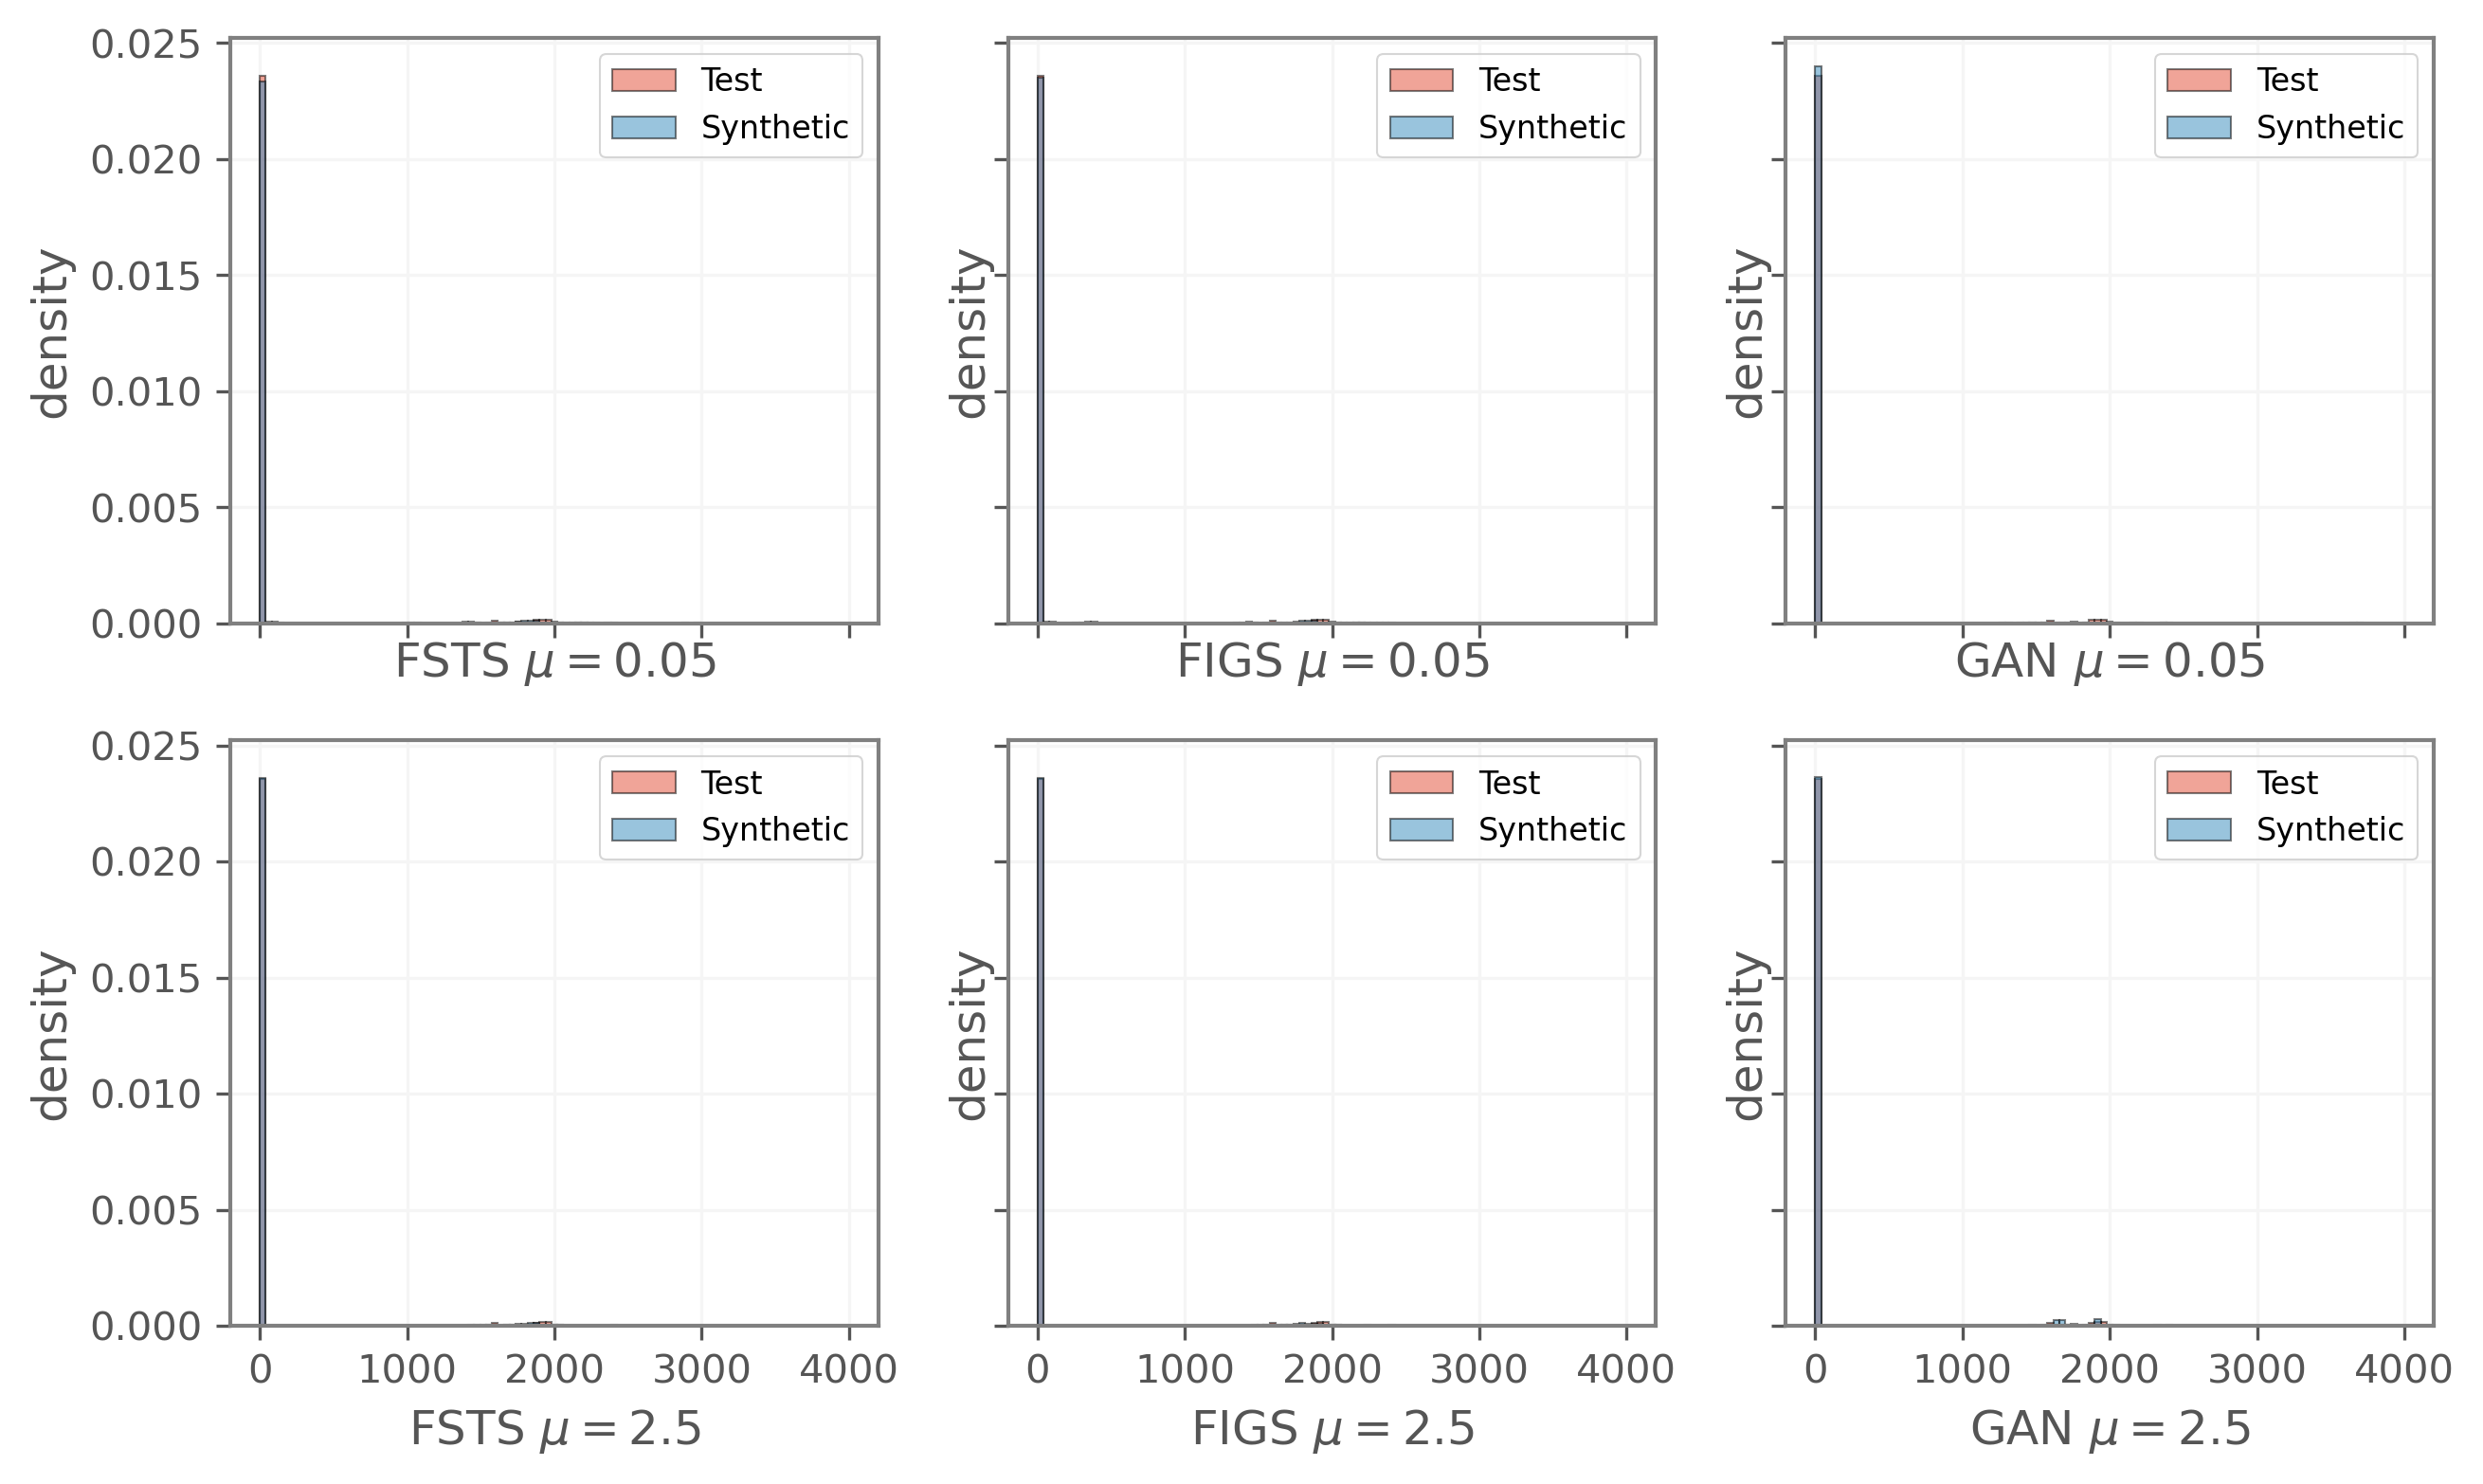

In [ ]:

#variable
sColumn = 'capital-loss'

#subplots
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize = (10,6), dpi = 300)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

#set y, bins
y = lTotalTestData[0][sColumn].values
bins = np.linspace(0, 4000, 100)

#first image
z1 = diDatasets[(0.1,"FTST")][sColumn].values
ax1.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax1.hist(z1, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax1.legend(loc='upper right')
ax1.set_xlabel('FSTS $\mu = 0.05$')
ax1.set_ylabel("density")

#second image
z2 = diDatasets[(0.1,"FIST")][sColumn].values
ax2.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax2.hist(z2, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax2.legend(loc='upper right')
ax2.set_xlabel('FIGS $\mu = 0.05$')
ax2.set_ylabel("density")

#third image
z3 = diDatasets[(0.1,"GAN")][sColumn].values
ax3.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax3.hist(z3, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax3.legend(loc='upper right')
ax3.set_xlabel('GAN $\mu = 0.05$')
ax3.set_ylabel("density")

#fourth
z4 = diDatasets[(1.0,"FTST")][sColumn].values
ax4.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax4.hist(z4, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax4.legend(loc='upper right')
ax4.set_xlabel('FSTS $\mu = 2.5$')
ax4.set_ylabel("density")

#fifth image
z5 = diDatasets[(1.0,"FIST")][sColumn].values
ax5.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax5.hist(z5, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax5.legend(loc='upper right')
ax5.set_xlabel('FIGS $\mu = 2.5$')
ax5.set_ylabel("density")

#last image
z6 = diDatasets[(1.0,"GAN")][sColumn].values
ax6.hist(y, bins, alpha = 0.5, density = True, label = "Test", ec='black')
ax6.hist(z6, bins, alpha = 0.5, density = True, label = "Synthetic", ec='black')
ax6.legend(loc='upper right')
ax6.set_xlabel('GAN $\mu = 2.5$')
ax6.set_ylabel("density")

plt.savefig('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/figures/capitallossRes.pdf', bbox_inches='tight')
#plt.show()

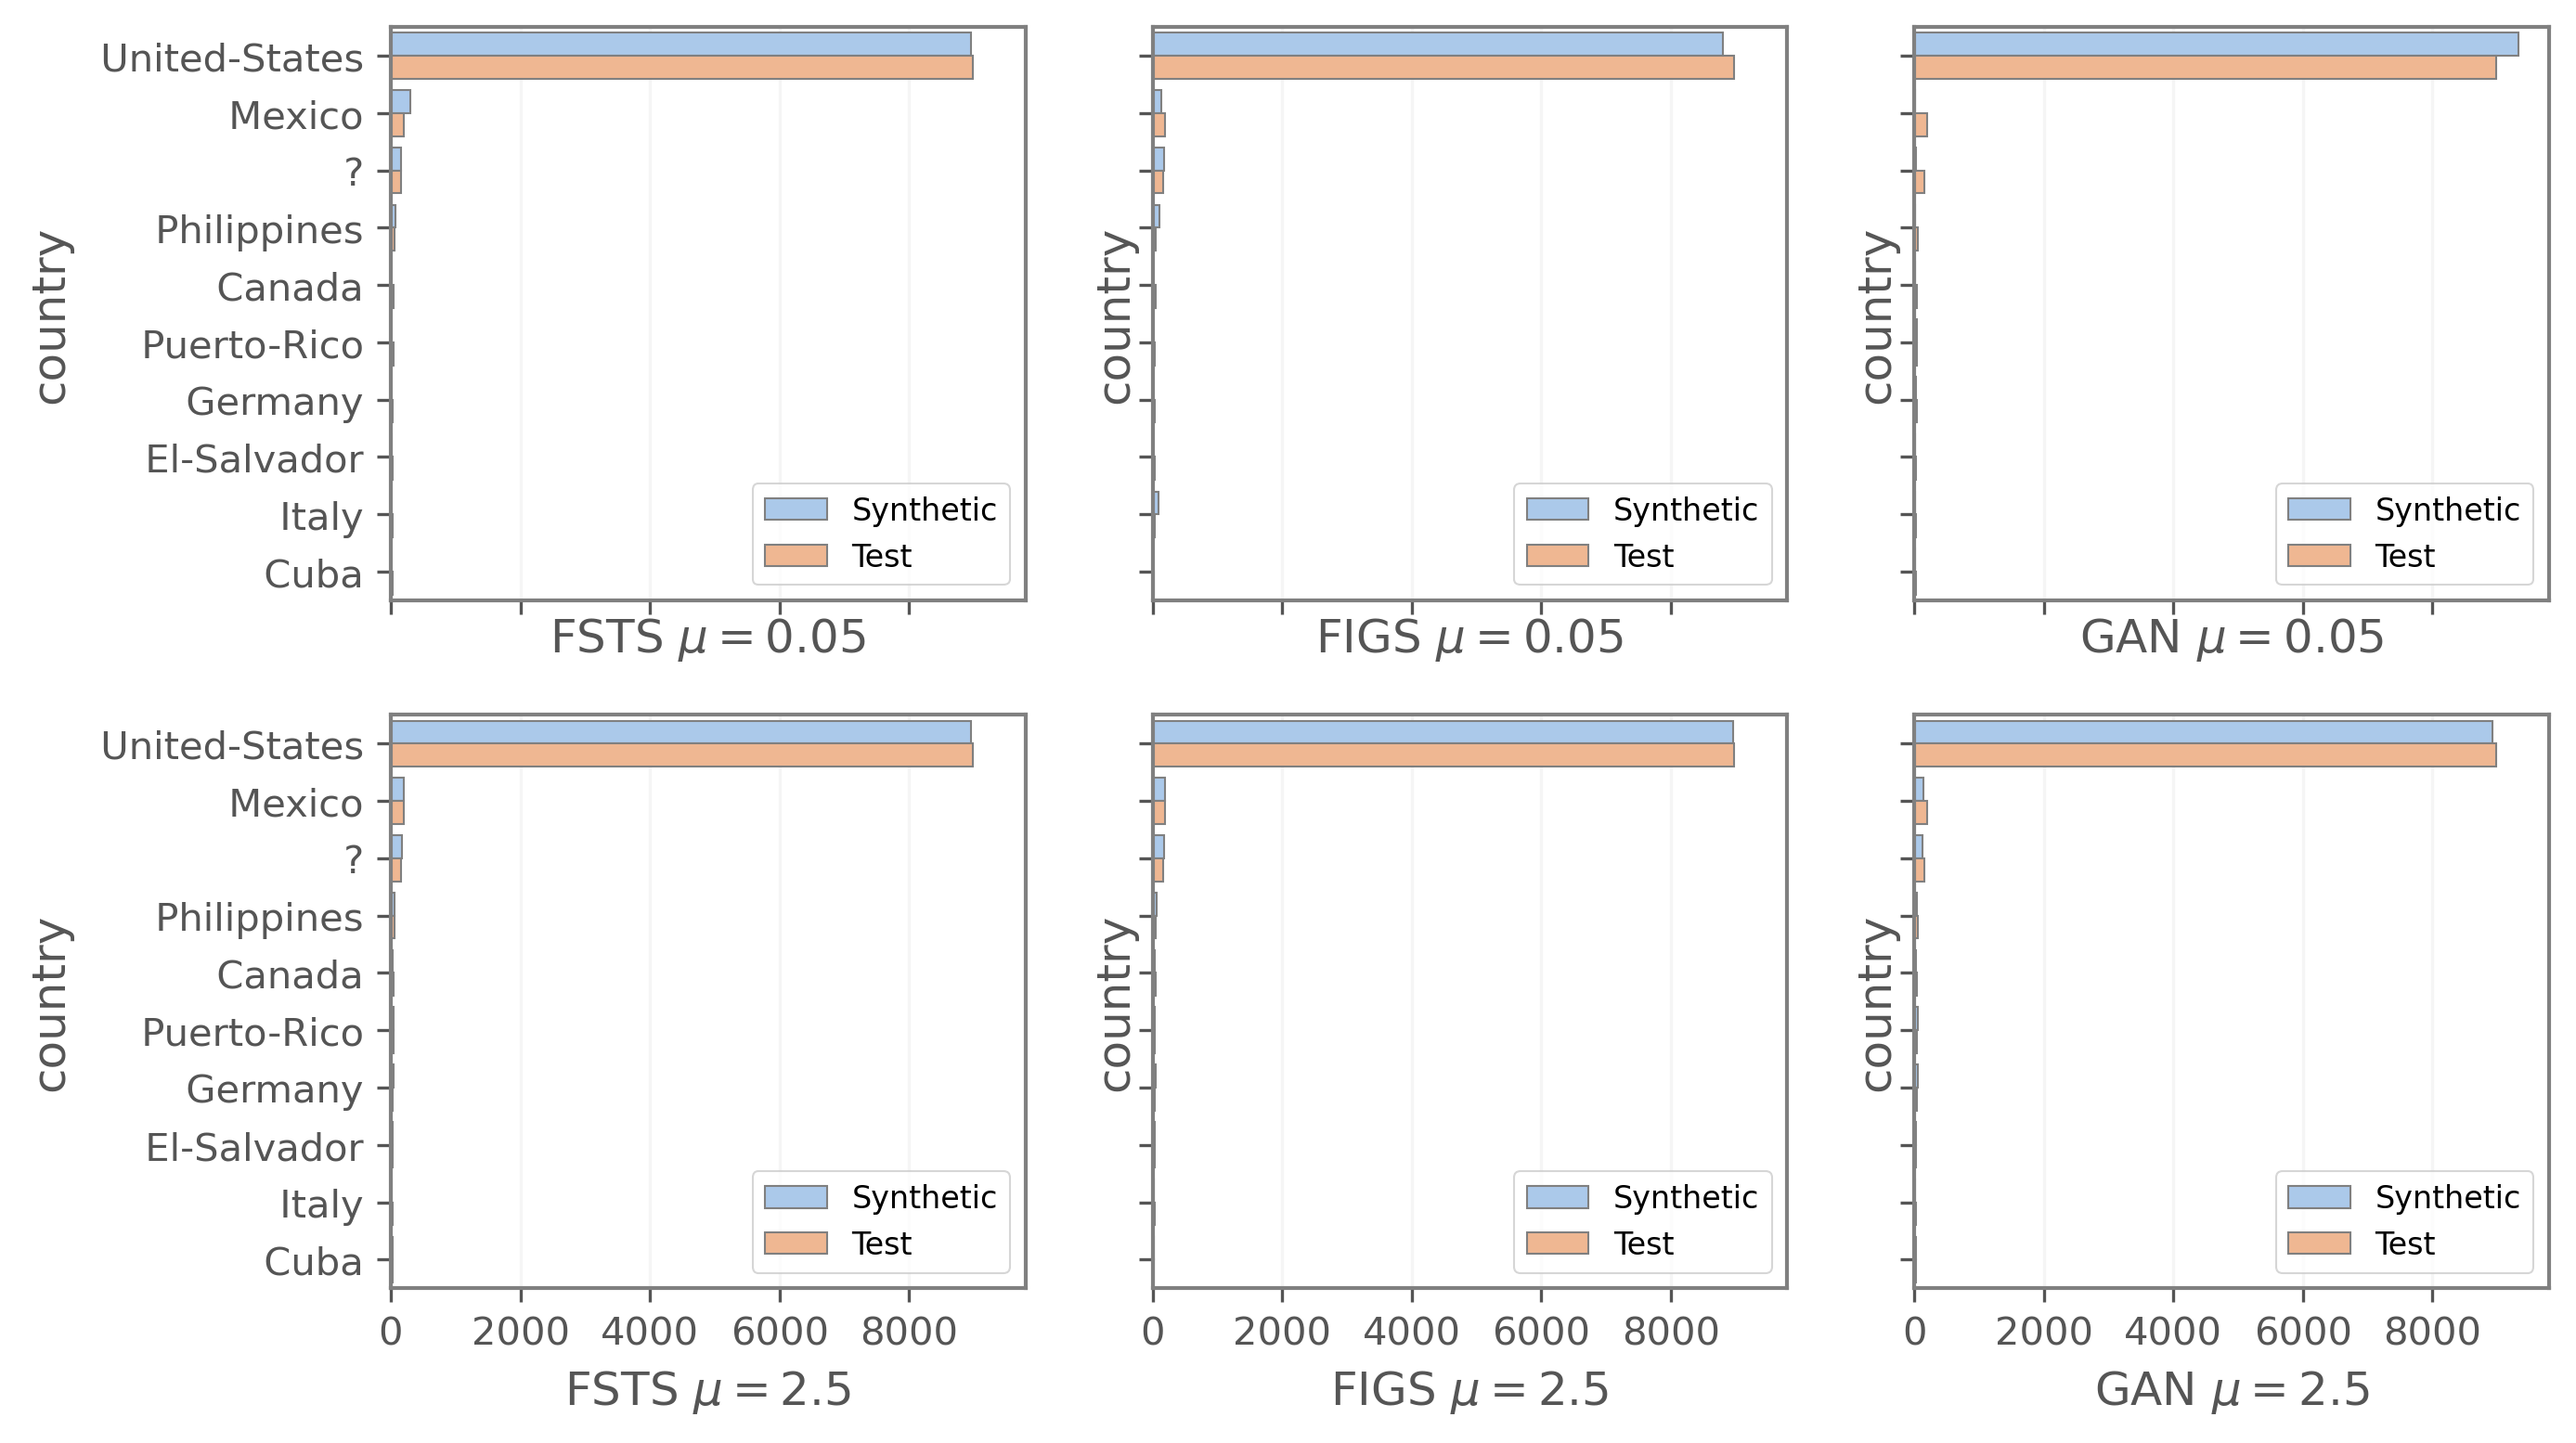

In [ ]:
import seaborn as sns

#variable
sColumn = "native-country"

#subplots
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize = (10,6), dpi = 300)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

#set y
dfTemp2 = pd.DataFrame.from_dict({'native-country': lTotalTestData[0][sColumn].values, 'type': ["Test" for _ in range(10000)]})

#plot 1
dfTemp1 = pd.DataFrame.from_dict({'native-country': diDatasets[(0.1,"FTST")][sColumn].values, 'type': ["Synthetic" for _ in range(10000)]})
dfPlotData = pd.concat( [dfTemp1, dfTemp2])
sns.countplot(
    data=dfPlotData, y="native-country", hue="type", ax = ax1, 
    palette="pastel", edgecolor=".5", order= lTotalTestData[0][sColumn].value_counts().iloc[:10].index
)
ax1.legend(loc='lower right')
ax1.set_xlabel('FSTS $\mu = 0.05$')
ax1.set_ylabel("country")

#plot 2
dfTemp1 = pd.DataFrame.from_dict({'native-country': diDatasets[(0.1,"FIST")][sColumn].values, 'type': ["Synthetic" for _ in range(10000)]})
dfPlotData = pd.concat( [dfTemp1, dfTemp2])
sns.countplot(
    data=dfPlotData, y="native-country", hue="type", ax = ax2, 
    palette="pastel", edgecolor=".5", order= lTotalTestData[0][sColumn].value_counts().iloc[:10].index
)
ax2.legend(loc='lower right')
ax2.set_xlabel('FIGS $\mu = 0.05$')
ax2.set_ylabel("country")

#plot 3
dfTemp1 = pd.DataFrame.from_dict({'native-country': diDatasets[(0.1,"GAN")][sColumn].values, 'type': ["Synthetic" for _ in range(10000)]})
dfPlotData = pd.concat( [dfTemp1, dfTemp2])
sns.countplot(
    data=dfPlotData, y="native-country", hue="type", ax = ax3, 
    palette="pastel", edgecolor=".5", order= lTotalTestData[0][sColumn].value_counts().iloc[:10].index
)
ax3.legend(loc='lower right')
ax3.set_xlabel('GAN $\mu = 0.05$')
ax3.set_ylabel("country")

#plot 4
dfTemp1 = pd.DataFrame.from_dict({'native-country': diDatasets[(1.0,"FTST")][sColumn].values, 'type': ["Synthetic" for _ in range(10000)]})
dfPlotData = pd.concat( [dfTemp1, dfTemp2])
sns.countplot(
    data=dfPlotData, y="native-country", hue="type", ax = ax4, 
    palette="pastel", edgecolor=".5", order= lTotalTestData[0][sColumn].value_counts().iloc[:10].index
)
ax4.legend(loc='lower right')
ax4.set_xlabel('FSTS $\mu = 2.5$')
ax4.set_ylabel("country")

#plot 5
dfTemp1 = pd.DataFrame.from_dict({'native-country': diDatasets[(1.0,"FIST")][sColumn].values, 'type': ["Synthetic" for _ in range(10000)]})
dfPlotData = pd.concat( [dfTemp1, dfTemp2])
sns.countplot(
    data=dfPlotData, y="native-country", hue="type", ax = ax5, 
    palette="pastel", edgecolor=".5", order= lTotalTestData[0][sColumn].value_counts().iloc[:10].index
)
ax5.legend(loc='lower right')
ax5.set_xlabel('FIGS $\mu = 2.5$')
ax5.set_ylabel("country")

#plot 6
dfTemp1 = pd.DataFrame.from_dict({'native-country': diDatasets[(1.0,"GAN")][sColumn].values, 'type': ["Synthetic" for _ in range(10000)]})
dfPlotData = pd.concat( [dfTemp1, dfTemp2])
sns.countplot(
    data=dfPlotData, y="native-country", hue="type", ax = ax6, 
    palette="pastel", edgecolor=".5", order= lTotalTestData[0][sColumn].value_counts().iloc[:10].index
)
ax6.legend(loc='lower right')
ax6.set_xlabel('GAN $\mu = 2.5$')
ax6.set_ylabel("country")

plt.savefig('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/figures/nativecountryRes.pdf', bbox_inches='tight')


In [ ]:
from dython.nominal import associations

lDatasets = [diDatasets[key] for key in diDatasets.keys()]
dfTransformedTrain, dfTransformedTest, _, _ = Evaluation(lDatasets, lTotalTrainData[0], lTotalTestData[0], lDataTypes=lDataTypes, sSynthType = "original", sEvalType = "original").quantile_discretization()
diDatasetsQuant = dict()
for key, value in diDatasets.items():
    _, _, dataQuant, _ = Evaluation([diDatasets[key]], lTotalTrainData[0], lTotalTestData[0], lDataTypes=lDataTypes, sSynthType = "original", sEvalType = "original").quantile_discretization()
    diDatasetsQuant[key] = dataQuant[0]

09/20/2022 18:49:15:WARNING:findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


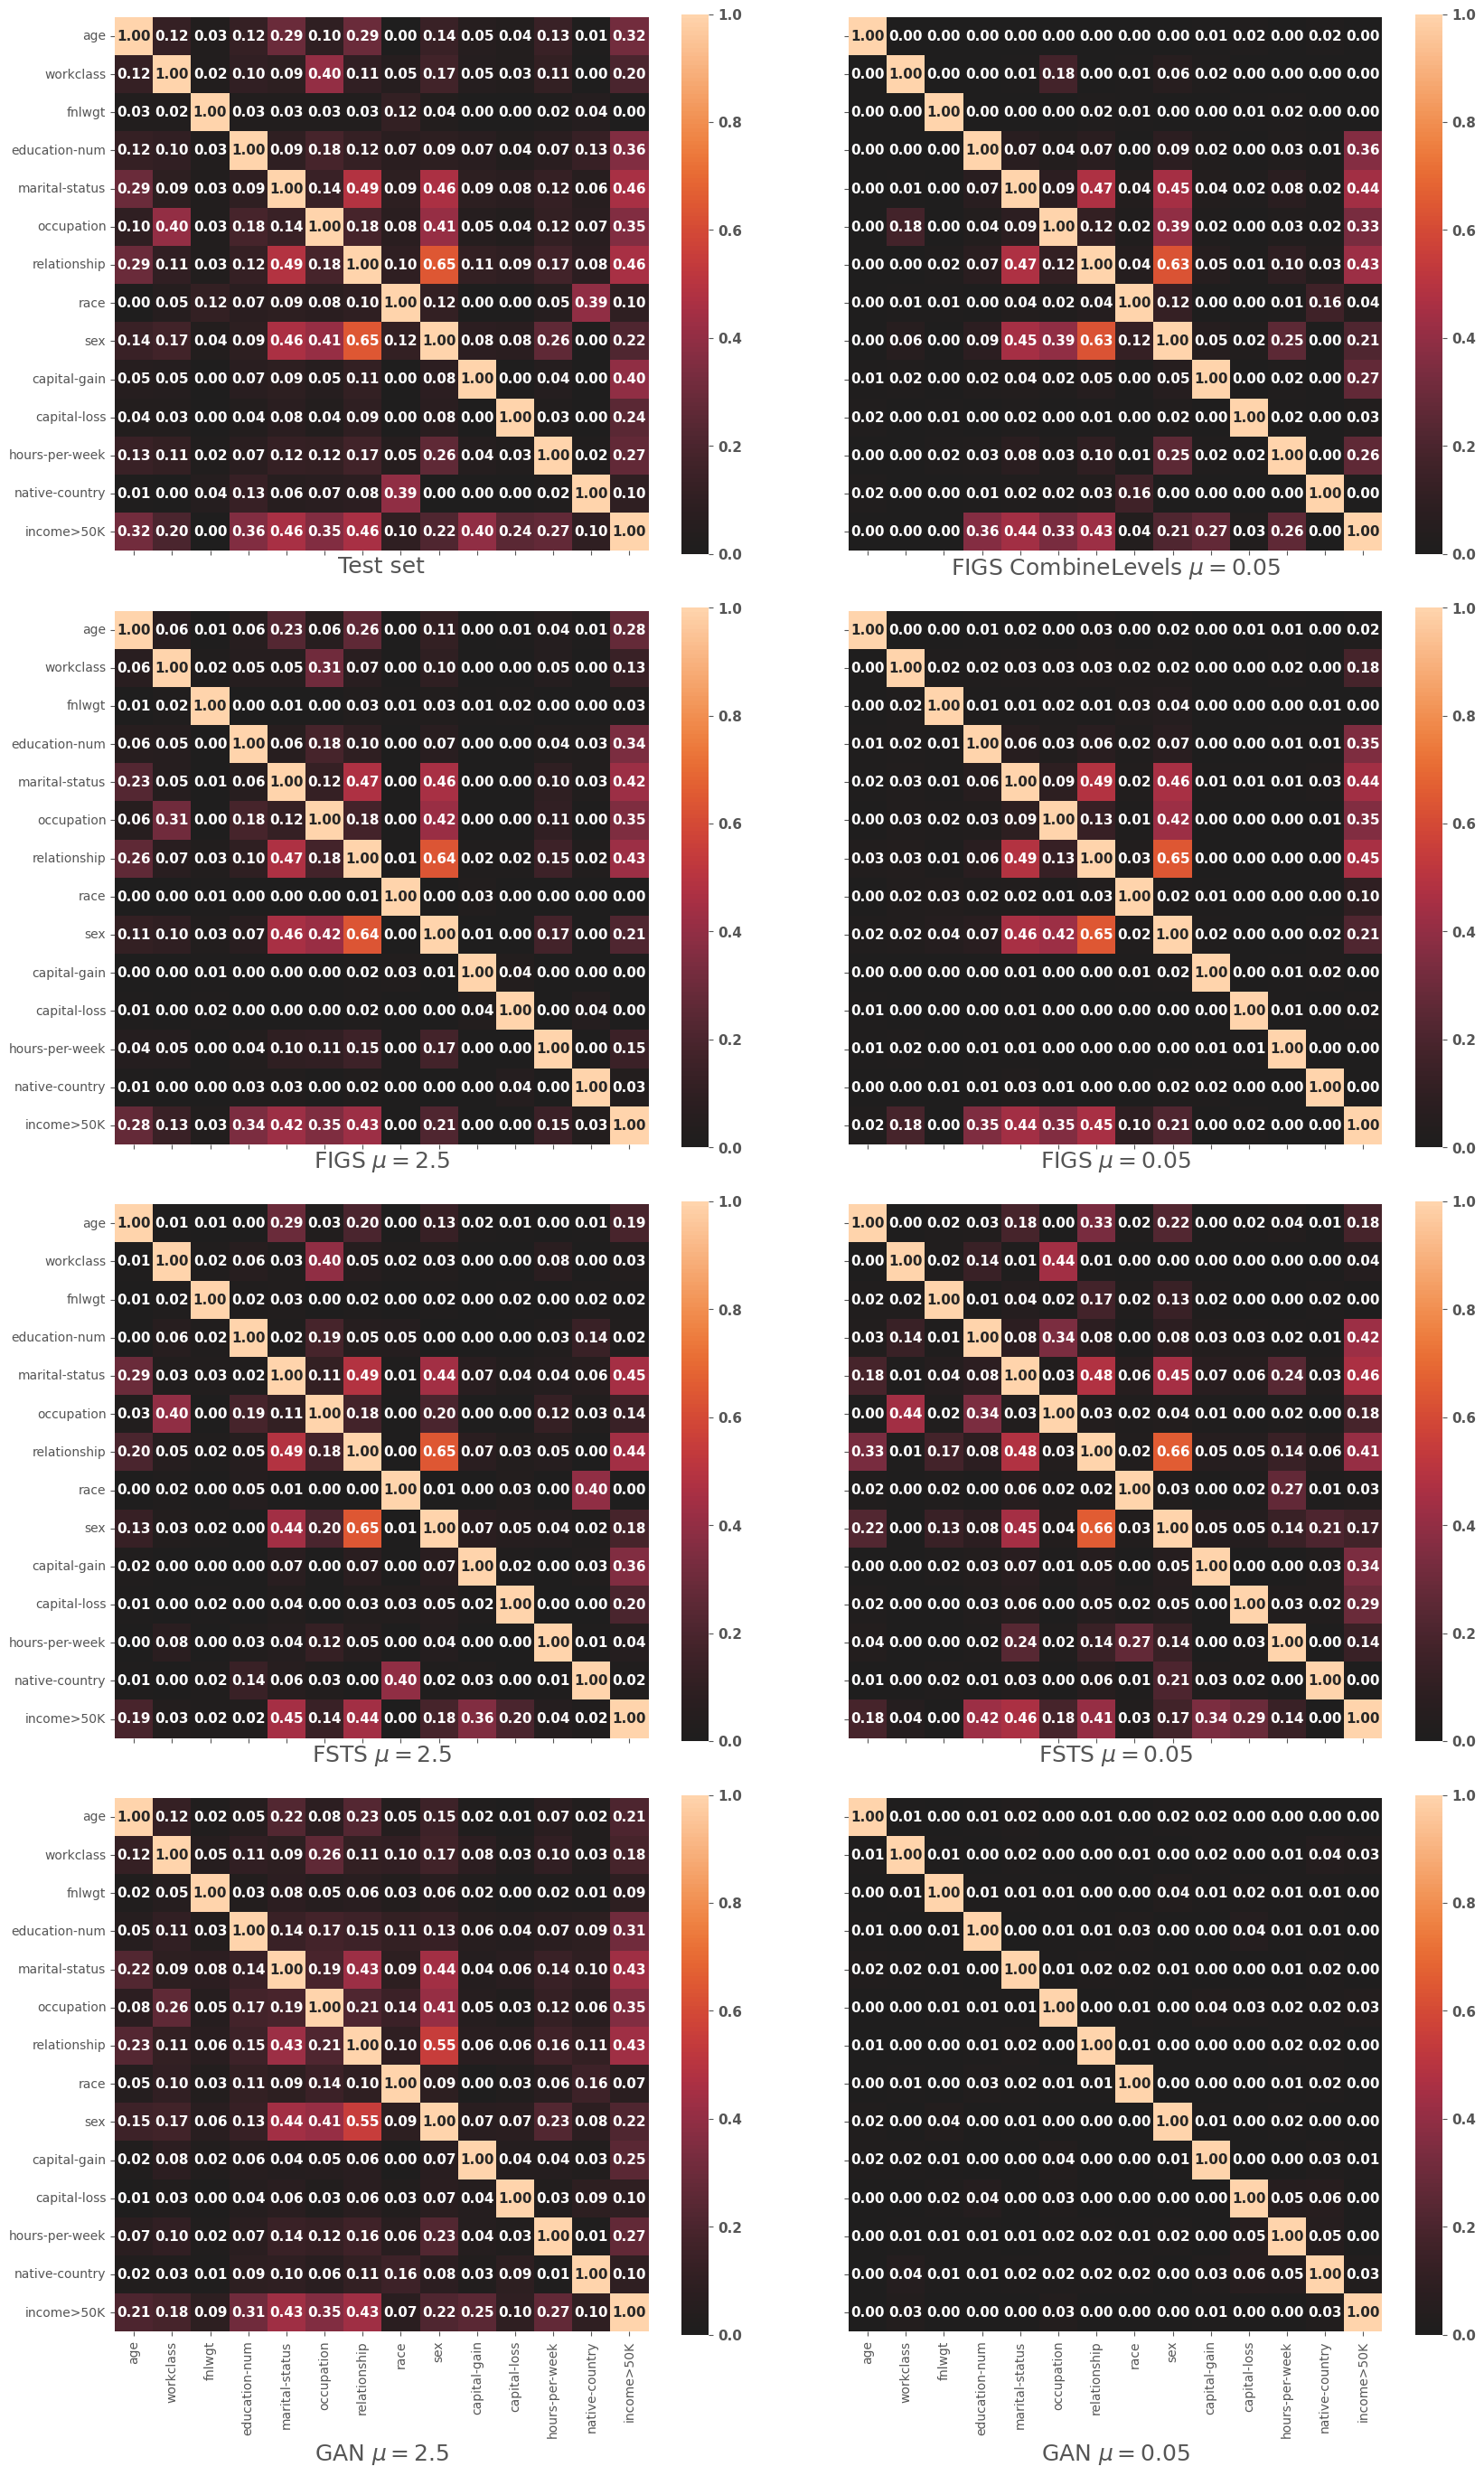

In [ ]:
#subplots
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize = (20,34), dpi = 100)

fig.subplots_adjust(hspace=0.1, wspace=0.1)
for a in axes.flatten():
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect('equal')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 11}
plt.rc('font', **font)
plt.rc('axes', labelsize=16)
#synthetic

#fig = plt.figure(figsize=(20,35)) # Notice the equal aspect ratio
#ax = [fig.add_subplot(4,2,i+1) for i in range(8)]
#for a in ax:
#    a.set_xticklabels([])
#    a.set_yticklabels([])
#    a.set_aspect('equal')

"""
associations(lTotalTestData[0], nominal_columns="all", nom_nom_assoc="cramer", ax = ax[0], plot = False, cbar = False)
ax[0].set_xlabel('Test set', fontsize = 18)
associations(diDatasetsQuant[(0.1,"FISTCorr")], nominal_columns="all", nom_nom_assoc="cramer", ax = ax[1],  plot = False, cbar = False)
ax[1].set_xlabel('FIST CombineLevels $\mu = 0.05$', fontsize = 18)
associations(diDatasetsQuant[(1.0,"FIST")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax[2],  plot = False, cbar = False)
ax[2].set_xlabel('FIST $\mu = 2.5$', fontsize = 18)
associations(diDatasetsQuant[(0.1,"FIST")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax[3],  plot = False, cbar = False)
ax[3].set_xlabel('FIST $\mu = 0.05$', fontsize = 18)
associations(diDatasetsQuant[(1.0,"FTST")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax[4],  plot = False, cbar = False)
ax[4].set_xlabel('FTST $\mu = 2.5$', fontsize = 18)
associations(diDatasetsQuant[(0.1,"FTST")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax[5],  plot = False, cbar = False)
ax[5].set_xlabel('FTST $\mu = 0.05$', fontsize = 18)
associations(diDatasetsQuant[(1.0,"GAN")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax[6],  plot = False, cbar = False)
ax[6].set_xlabel('GAN $\mu = 2.5$', fontsize = 18)
associations(diDatasetsQuant[(0.1,"GAN")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax[7],  plot = False, cbar = False)
ax[7].set_xlabel('GAN $\mu = 0.05$', fontsize = 18)
"""
associations(dfTransformedTest, nominal_columns="all", nom_nom_assoc="cramer", ax = ax1, plot = False, cbar = True)
ax1.set_xlabel('Test set', fontsize = 18)
associations(diDatasetsQuant[(0.1,"FISTCorr")], nominal_columns="all", nom_nom_assoc="cramer", ax = ax2,  plot = False, cbar = True)
ax2.set_xlabel('FIGS CombineLevels $\mu = 0.05$', fontsize = 18)
associations(diDatasetsQuant[(1.0,"FIST")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax3,  plot = False, cbar = True)
ax3.set_xlabel('FIGS $\mu = 2.5$', fontsize = 18)
associations(diDatasetsQuant[(0.1,"FIST")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax4,  plot = False, cbar = True)
ax4.set_xlabel('FIGS $\mu = 0.05$', fontsize = 18)
associations(diDatasetsQuant[(1.0,"FTST")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax5,  plot = False, cbar = True)
ax5.set_xlabel('FSTS $\mu = 2.5$', fontsize = 18)
associations(diDatasetsQuant[(0.1,"FTST")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax6,  plot = False, cbar = True)
ax6.set_xlabel('FSTS $\mu = 0.05$', fontsize = 18)
associations(diDatasetsQuant[(1.0,"GAN")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax7,  plot = False, cbar = True)
ax7.set_xlabel('GAN $\mu = 2.5$', fontsize = 18)
associations(diDatasetsQuant[(0.1,"GAN")], nominal_columns="all", nom_nom_assoc="cramer",ax = ax8,  plot = False, cbar = True)
ax8.set_xlabel('GAN $\mu = 0.05$', fontsize = 18)

plt.savefig('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/figures/correlationsRes2.pdf', bbox_inches='tight')


In [ ]:
lTotalTestData[0]

age          workclass  fnlwgt  education-num       marital-status  \
28481   70                  ?   26990              9   Married-civ-spouse   
22403   81   Self-emp-not-inc  108604              6   Married-civ-spouse   
8519    72            Private  132753             10   Married-civ-spouse   
17916   19            Private  226913             10        Never-married   
9193    19            Private  182590              9        Never-married   
...    ...                ...     ...            ...                  ...   
2247    31            Private  302626             10             Divorced   
18038   61                  ?  232618             15   Married-civ-spouse   
17005   61   Self-emp-not-inc  243493              9   Married-civ-spouse   
3347    47          Local-gov  251588             13   Married-civ-spouse   
19591   47            Private  243904              9             Divorced   

             occupation relationship    race      sex  capital-gain  \
28481                 ?      Husband   White     Male             0   
22403   Farming-fishing      Husband   White     Male             0   
8519       Adm-clerical      Husband   White     Male             0   
17916             Sales    Own-child   White   Female             0   
9193      Other-service    Own-child   White   Female             0   
...                 ...          ...     ...      ...           ...   
2247       Adm-clerical    Unmarried   White   Female             0   
18038                 ?      Husband   White     Male             0   
17005     Other-service      Husband   Black     Male             0   
3347    Exec-managerial      Husband   Black     Male             0   
19591      Adm-clerical    Unmarried   White     Male             0   

       capital-loss  hours-per-week  native-country income>50K  
28481             0              60   United-States      <=50K  
22403             0              45   United-States      <=50K  
8519              0              15   United-States      <=50K  
17916             0              20   United-States      <=50K  
9193              0              40   United-States      <=50K  
...             ...             ...             ...        ...  
2247              0              40   United-States      <=50K  
18038             0              40   United-States       >50K  
17005             0              12   United-States      <=50K  
3347              0              40   United-States       >50K  
19591             0              40        Honduras      <=50K  

[10000 rows x 14 columns]

In [11]:
#load results
import pickle as pk
import numpy as np

#set mu's 
vMu = np.array([0.01,0.025,0.05,0.10,0.25,0.50,1.0,2.5])

#get names 
diNames = {0:"homogeneous_equalsize_PGM_Independent_noCorrBins_defaultScore_maxDegree2_adult",
           1:"homogeneous_equalsize_PGM_FTST_noCorrBins_defaultScore_maxDegree2_adult",
           2:"homogeneous_equalsize_PGM_FTST_noCorrBins_randomScore_maxDegree2_adult",
           3:"homogeneous_equalsize_PGM_FTST_corrBins_defaultScore_maxDegree2_adult",
           4:"homogeneous_equalsize_PGM_FIST_noCorrBins_defaultScore_maxDegree3_adult",
           5:"homogeneous_equalsize_PGM_FIST_noCorrBins_randomScore_maxDegree2_adult",
           6:"homogeneous_equalsize_PGM_FIST_corrBins_defaultScore_maxDegree3_adult",
           7:"homogeneous_equalsize_GAN_noMode_NA_noScaffold_NA_adult",
           8:"homogeneous_equalsize_GAN_withMode_NA_noScaffold_NA_adult",
           9:"homogeneous_equalsize_TrainData_NA_NA_NA_NA_adult"}

#get results 1-way marginals
diMarg1Res = dict()
for key, value in diNames.items():
    with open(f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/results_agg/marginals1_{value}.pickle", 'rb') as handle:
        diMarg1Res[key]  = pk.load(handle)

#get results 2-way marigals
diMarg2Res = dict()
for key, value in diNames.items():
    with open(f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/results_agg/marginals2_{value}.pickle", 'rb') as handle:
        diMarg2Res[key]  = pk.load(handle)

#get results 3-way marginals
diMarg3Res = dict()
for key, value in diNames.items():
    with open(f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/results_agg/marginals3_{value}.pickle", 'rb') as handle:
        diMarg3Res[key]  = pk.load(handle)


In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from matplotlib.lines import Line2D
plt.style.use("ggplot")
plt.rcParams['axes.facecolor']='w'
plt.rc('axes',edgecolor='grey')
plt.rcParams.update({"axes.grid" : True, "grid.color": "gainsboro"})
plt.rc('legend',fontsize=8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)
plt.rc('axes', labelsize=22)


10/09/2022 19:33:49:WARNING:findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
10/09/2022 19:33:49:WARNING:findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
10/09/2022 19:33:50:WARNING:findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


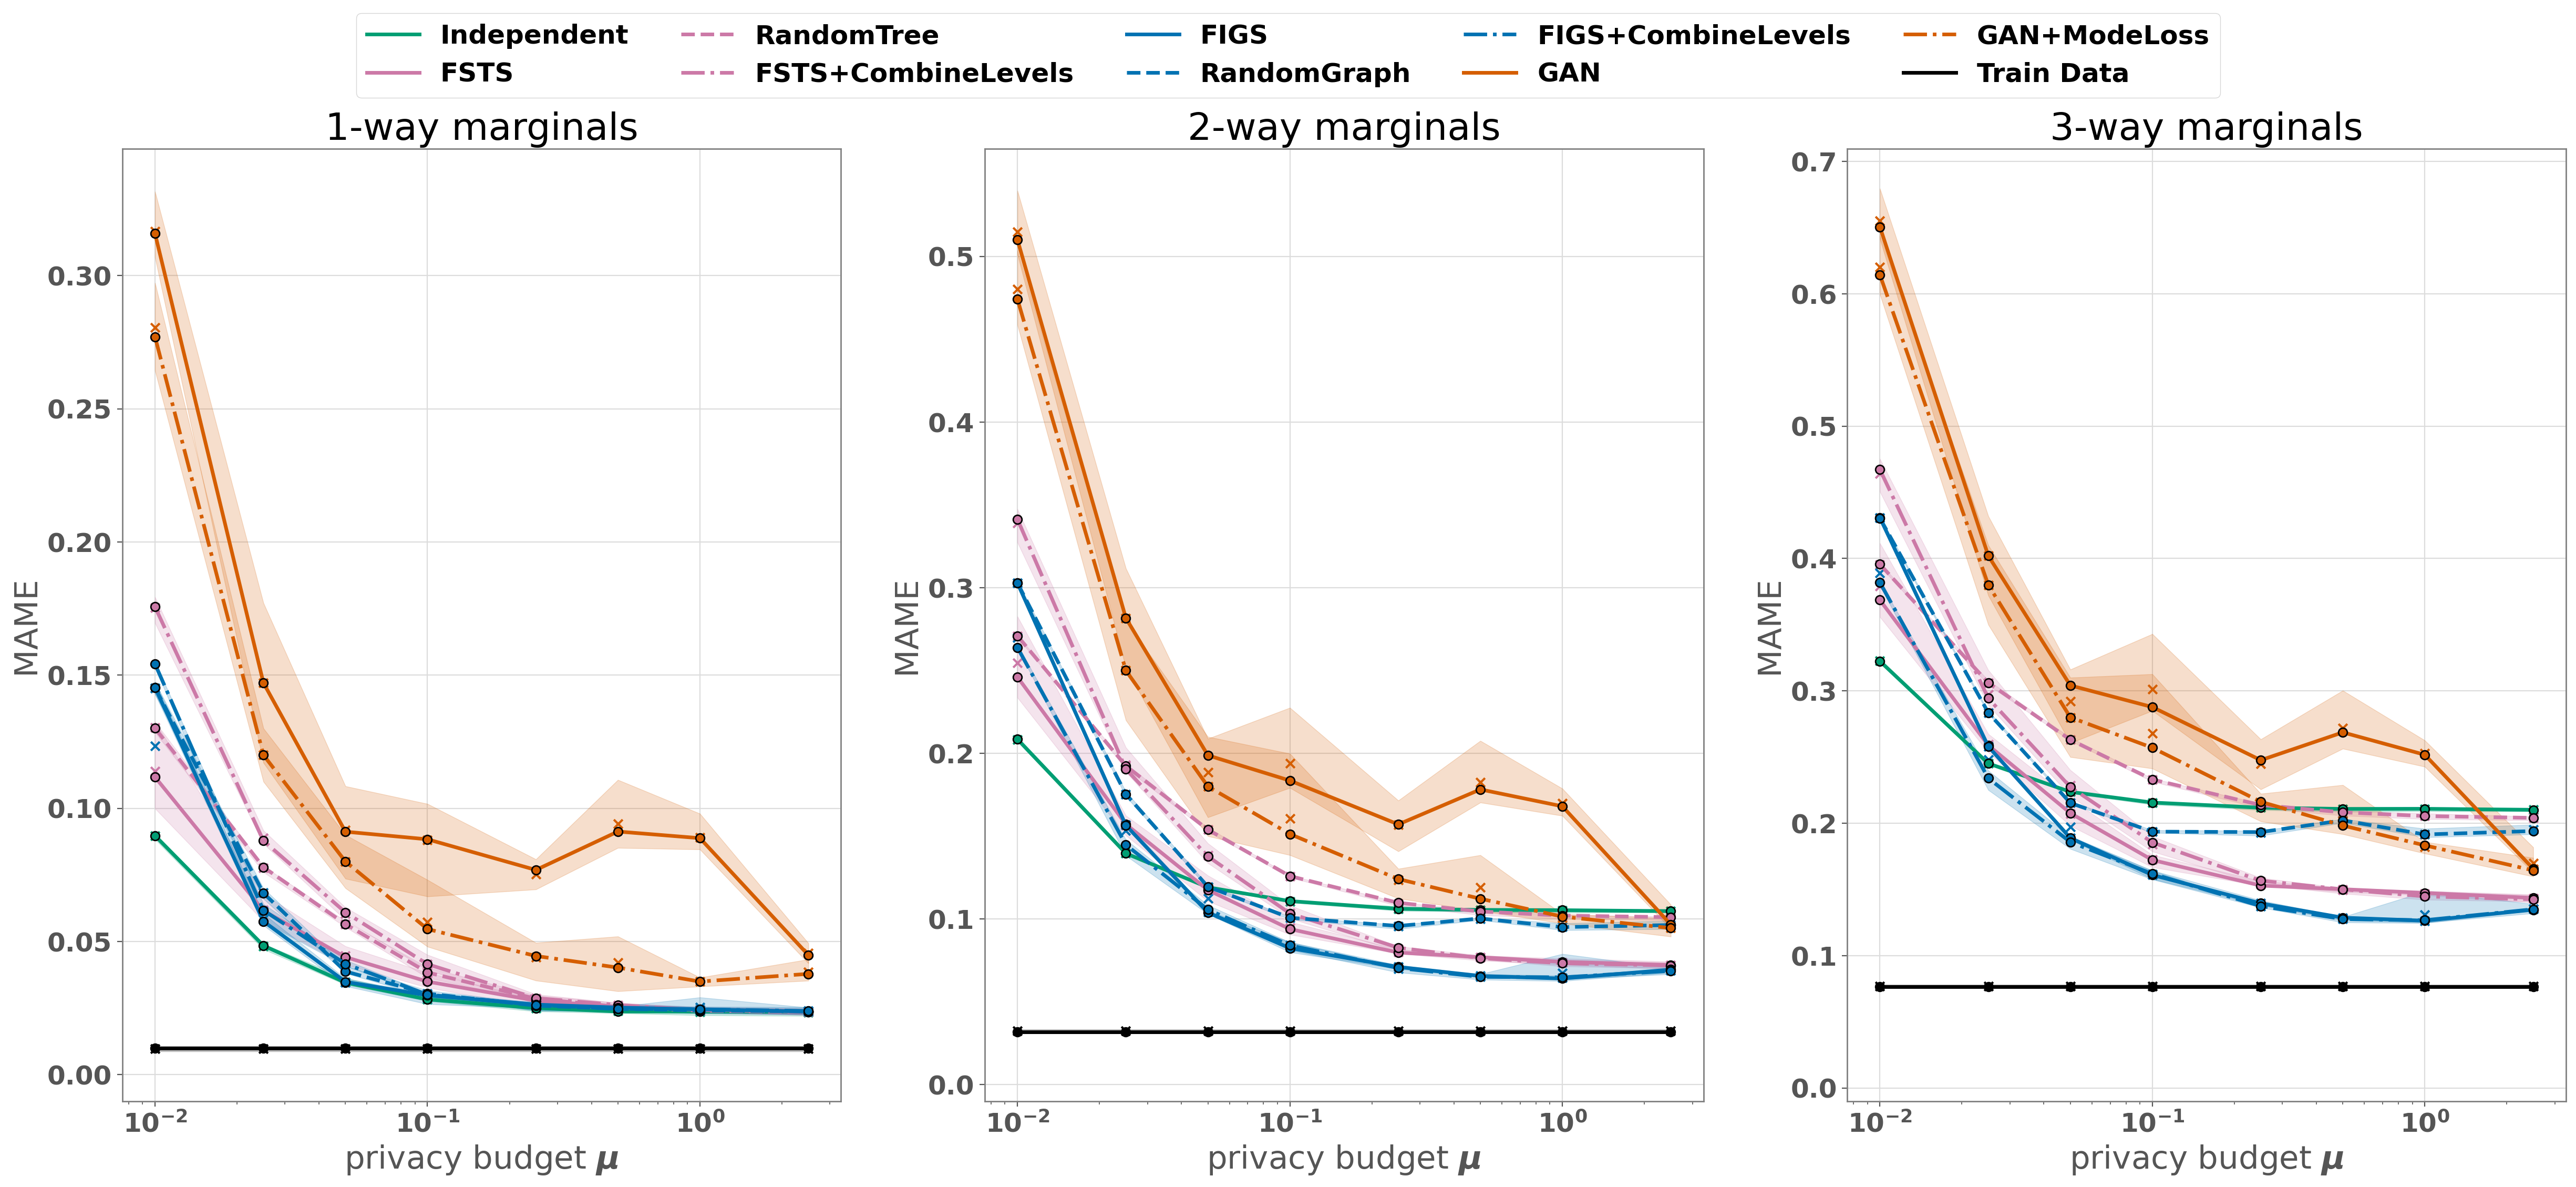

In [13]:

#define plot
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize = (30,12), dpi = 200)
ax1, ax2, ax3 = axes.flatten()

#set types

#custom_cycler = (cycler(color=["#009E73", "#F0E442", "#F0E442","#F0E442","#0072B2","#0072B2","#0072B2","#D55E00","#D55E00","#000000"]) +
#                  cycler(linestyle=["-", "-", "--","-.","-","--","-.","-","-.","-"]))
lColors = ["#009E73", "#CC79A7", "#CC79A7","#CC79A7","#0072B2","#0072B2","#0072B2","#D55E00","#D55E00","#000000"]
lLineStyles = ["-", "-", "--","-.","-","--","-.","-","-.","-"]


#first plot
for key, mResults in diMarg1Res.items():
    ax1.scatter(vMu, mResults[:,0], marker = "x", color = lColors[key])
    if key == 6:
        mResults[0,:] = mResults[0,:] * 1.25
    ax1.plot(vMu, mResults[:,1], marker = 'o',
          linestyle = lLineStyles[key],
          color = lColors[key],
          markerfacecolor=lColors[key],
          markeredgecolor='k', 
          linewidth=2.5)
    ax1.fill_between(vMu, mResults[:,2], mResults[:,3],color = lColors[key],  alpha = 0.2)
#ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel('privacy budget $\mu$')
ax1.set_ylabel("MAME")
ax1.set_ylim(bottom=-0.01)
ax1.set_title("1-way marginals")


#second plot
for key, mResults in diMarg2Res.items():
    ax2.scatter(vMu, mResults[:,0], marker = "x", color = lColors[key])
    if key == 6:
            mResults[0:3,:] = mResults[0:3,:] * 0.98
            mResults[1:3,:] = mResults[1:3,:] * 0.96
    ax2.plot(vMu, mResults[:,1], marker = 'o',
          linestyle = lLineStyles[key],
          color = lColors[key],
          markerfacecolor=lColors[key],
          markeredgecolor='k', 
          linewidth=2.5)
    ax2.fill_between(vMu, mResults[:,2], mResults[:,3], color = lColors[key], alpha = 0.2)
#ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_title('2-way marginals')
ax2.set_xlabel('privacy budget $\mu$')
ax2.set_ylabel("MAME")
ax2.set_ylim(bottom=-0.01)


#third plot
for key, mResults in diMarg3Res.items():
    ax3.scatter(vMu, mResults[:,0], marker = "x", color = lColors[key])
    if key == 6:
        mResults[0:3,:] = mResults[0:3,:] * 0.98
        mResults[1:3,:] = mResults[1:3,:] * 0.96
    ax3.plot(vMu, mResults[:,1], marker = 'o',
          linestyle = lLineStyles[key],
          color = lColors[key],
          markerfacecolor=lColors[key],
          markeredgecolor='k', 
          linewidth=2.5)
    ax3.fill_between(vMu, mResults[:,2], mResults[:,3],color = lColors[key],  alpha = 0.2)
#ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_title('3-way marginals')
ax3.set_xlabel('privacy budget $\mu$')
ax3.set_ylabel("MAME")
ax3.set_ylim(bottom=-0.01)


#set legend
lines = [Line2D([0], [0], color=c, linewidth=2.5, linestyle=l) for c, l in zip(lColors, lLineStyles)]
labels = ['Independent', 'FSTS', 'RandomTree', "FSTS+CombineLevels","FIGS", "RandomGraph", "FIGS+CombineLevels","GAN", "GAN+ModeLoss", "Train Data"]
fig.legend(lines, labels, loc = "upper center", ncol = 5, fancybox = True, fontsize = 18)


plt.savefig('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/figures/hoe_marginal_results.png', bbox_inches='tight')


# Plots heterogeneity

In [ ]:
#load results
import pickle as pk
import numpy as np

#set mu's 
vMu = np.array([0.01,0.025,0.05,0.10,0.25,0.50,1.0,2.5])

#get names 
diNames = {0:"heterogeneous_equalsize_PGM_Independent_noCorrBins_defaultScore_maxDegree2_adult",
           1:"heterogeneous_equalsize_PGM_FTST_noCorrBins_defaultScore_maxDegree2_adult",
           2:"heterogeneous_equalsize_PGM_FTST_noCorrBins_adjustedScore_maxDegree2_adult",
           3:"heterogeneous_equalsize_PGM_FTST_noCorrBins_localModel_maxDegree2_adult_adj",
           4:"homogeneous_equalsize_PGM_FTST_noCorrBins_defaultScore_maxDegree2_adult",
           5:"heterogeneous_equalsize_PGM_FIST_noCorrBins_defaultScore_maxDegree3_adult",
           6:"heterogeneous_equalsize_PGM_FIST_noCorrBins_adjustedScore_maxDegree3_adult",
           7:"homogeneous_equalsize_PGM_FIST_noCorrBins_defaultScore_maxDegree3_adult",
           8:"heterogeneous_equalsize_GAN_withMode_NA_noScaffold_NA_adult",
           9:"heterogeneous_equalsize_GAN_withMode_NA_withScaffold_NA_adult",
           10:"homogeneous_equalsize_GAN_withMode_NA_noScaffold_NA_adult",
           11:"heterogeneous_equalsize_TrainData_NA_NA_NA_NA_adult"}


#get results 1-way marginals
diMarg1Res = dict()
for key, value in diNames.items():
    with open(f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/results_agg/marginals1_{value}.pickle", 'rb') as handle:
        diMarg1Res[key]  = pk.load(handle)

#get results 2-way marigals
diMarg2Res = dict()
for key, value in diNames.items():
    with open(f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/results_agg/marginals2_{value}.pickle", 'rb') as handle:
        diMarg2Res[key]  = pk.load(handle)

#get results 3-way marginals
diMarg3Res = dict()
for key, value in diNames.items():
    with open(f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/results_agg/marginals3_{value}.pickle", 'rb') as handle:
        diMarg3Res[key]  = pk.load(handle)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from matplotlib.lines import Line2D
plt.style.use("ggplot")
plt.rcParams['axes.facecolor']='w'
plt.rc('axes',edgecolor='grey')
plt.rcParams.update({"axes.grid" : True, "grid.color": "gainsboro"})
plt.rc('legend',fontsize=8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)
plt.rc('axes', labelsize=22)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


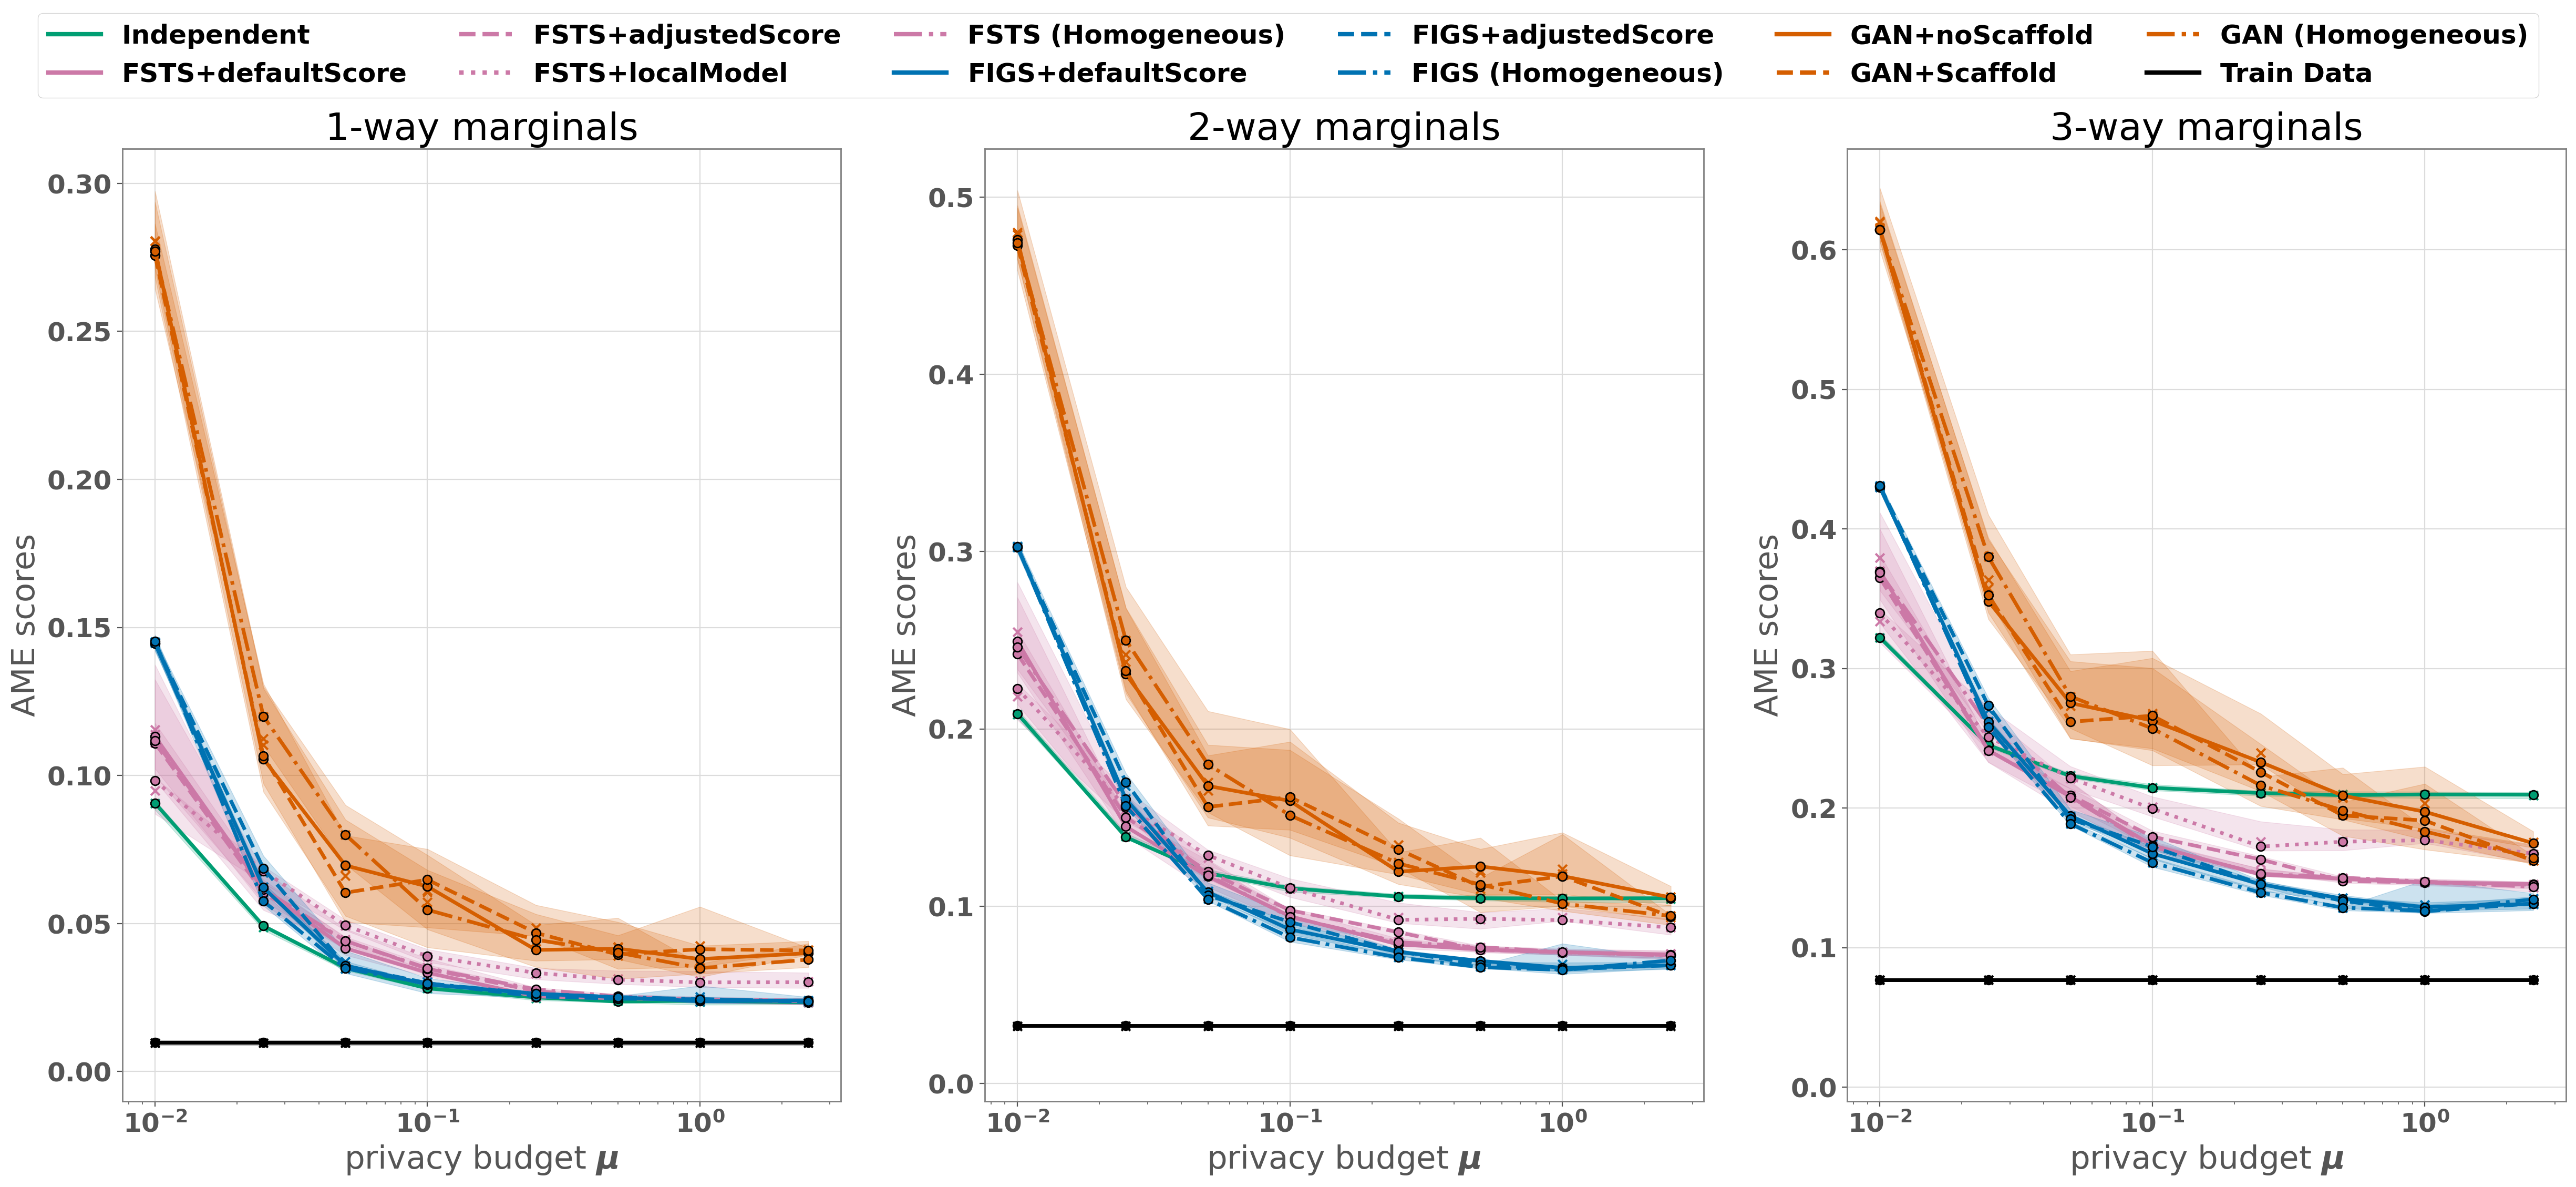

In [ ]:
#define plot
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize = (30,12), dpi = 200)
ax1, ax2, ax3 = axes.flatten()

#set types
lColors = ["#009E73", "#CC79A7", "#CC79A7","#CC79A7", "#CC79A7","#0072B2","#0072B2","#0072B2","#D55E00","#D55E00","#D55E00","#000000"]
lLineStyles = ["-", "-", "--", ":", "-.", "-", "--", "-.",  "-", "--", "-.", "-"]#["-", "-", "--","-.","-","--","-.","-","-.","-", "-", "-"]


#first plot
for key, mResults in diMarg1Res.items():
    ax1.scatter(vMu, mResults[:,0], marker = "x", color = lColors[key])
    ax1.plot(vMu, mResults[:,1], marker = 'o',
          linestyle = lLineStyles[key],
          color = lColors[key],
          markerfacecolor=lColors[key],
          markeredgecolor='k',
          linewidth = 2.5)
    ax1.fill_between(vMu, mResults[:,2], mResults[:,3],color = lColors[key],  alpha = 0.2)
#ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel('privacy budget $\mu$')
ax1.set_ylabel("MAME")
ax1.set_ylim(bottom=-0.01)
ax1.set_title("1-way marginals")
#ax1.set_yscale("log")

#second plot
for key, mResults in diMarg2Res.items():
    if key == 8: 
        mResults[4:6] = mResults[4:6] * 1.05
        mResults[6:8] = mResults[6:8] * 1.11
    ax2.scatter(vMu, mResults[:,0], marker = "x", color = lColors[key])
    ax2.plot(vMu, mResults[:,1], marker = 'o',
          linestyle = lLineStyles[key],
          color = lColors[key],
          markerfacecolor=lColors[key],
          markeredgecolor='k',
          linewidth = 2.5)
    ax2.fill_between(vMu, mResults[:,2], mResults[:,3], color = lColors[key], alpha = 0.2)
#ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_title('2-way marginals')
ax2.set_xlabel('privacy budget $\mu$')
ax2.set_ylabel("MAME")
ax2.set_ylim(bottom=-0.01)
#ax2.set_yscale("log")


#third plot
for key, mResults in diMarg3Res.items():
    if key == 8: 
        mResults[4:6] = mResults[4:6] * 1.04
        mResults[6:8] = mResults[6:8] * 1.07
        mResults[4,:] = mResults[4,:] * 1.1
    if key == 9:
        mResults[6,:] = mResults[6,:] *0.95
    ax3.scatter(vMu, mResults[:,0], marker = "x", color = lColors[key])
    ax3.plot(vMu, mResults[:,1], marker = 'o',
          linestyle = lLineStyles[key],
          color = lColors[key],
          markerfacecolor=lColors[key],
          markeredgecolor='k',
          linewidth = 2.5)
    ax3.fill_between(vMu, mResults[:,2], mResults[:,3],color = lColors[key],  alpha = 0.2)
#ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_title('3-way marginals')
ax3.set_xlabel('privacy budget $\mu$')
ax3.set_ylabel("MAME")
ax3.set_ylim(bottom=-0.01)
#ax3.set_yscale("log")


#set legend
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=l) for c, l in zip(lColors, lLineStyles)]
labels = ['Independent', 'FSTS+defaultScore', 'FSTS+adjustedScore', "FSTS+localModel", "FSTS (Homogeneous)","FIGS+defaultScore", "FIGS+adjustedScore", "FIGS (Homogeneous)","GAN+noScaffold", "GAN+Scaffold","GAN (Homogeneous)", "Train Data"]
fig.legend(lines, labels, loc = "upper center", ncol = 6, fancybox = True, fontsize = 18)


plt.savefig('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/figures/hee_marginal_results_adult.pdf', bbox_inches='tight')


In [ ]:
#load results
import pickle as pk
import numpy as np

#set mu's 
vMu = np.array([0.01,0.025,0.05,0.10,0.25,0.50,1.0,2.5])

#get names 
diNames = {0:"heterogeneous_equalsize_PGM_Independent_noCorrBins_defaultScore_maxDegree2_adult",
           1:"heterogeneous_equalsize_PGM_FTST_noCorrBins_defaultScore_maxDegree2_adult",
           2:"heterogeneous_equalsize_PGM_FTST_noCorrBins_adjustedScore_maxDegree2_adult",
           3:"heterogeneous_equalsize_PGM_FTST_noCorrBins_localModel_maxDegree2_adult_adj",
           4:"homogeneous_equalsize_PGM_FTST_noCorrBins_defaultScore_maxDegree2_adult",
           5:"heterogeneous_equalsize_PGM_FIST_noCorrBins_defaultScore_maxDegree3_adult",
           6:"heterogeneous_equalsize_PGM_FIST_noCorrBins_adjustedScore_maxDegree3_adult",
           7:"homogeneous_equalsize_PGM_FIST_noCorrBins_defaultScore_maxDegree3_adult",
           8:"heterogeneous_equalsize_GAN_withMode_NA_noScaffold_NA_adult",
           9:"heterogeneous_equalsize_GAN_withMode_NA_withScaffold_NA_adult",
           10:"homogeneous_equalsize_GAN_withMode_NA_noScaffold_NA_adult"}

#get results 3-way marginals
diLRRes = dict()
for key, value in diNames.items():
    with open(f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/results_agg/discriminator_LR_{value}.pickle", 'rb') as handle:
        diLRRes[key]  = pk.load(handle)

#get results 3-way marginals
diRFRes = dict()
for key, value in diNames.items():
    with open(f"C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/results_agg/discriminator_RF_{value}.pickle", 'rb') as handle:
        diRFRes[key]  = pk.load(handle)

In [ ]:
diLRRes[10][1,0:4] = np.array([0.27496202, 0.30496202, 0.20, 0.35])
diLRRes[10][2,0:4] = np.array([0.18496202, 0.20496202, 0.11, 0.20])



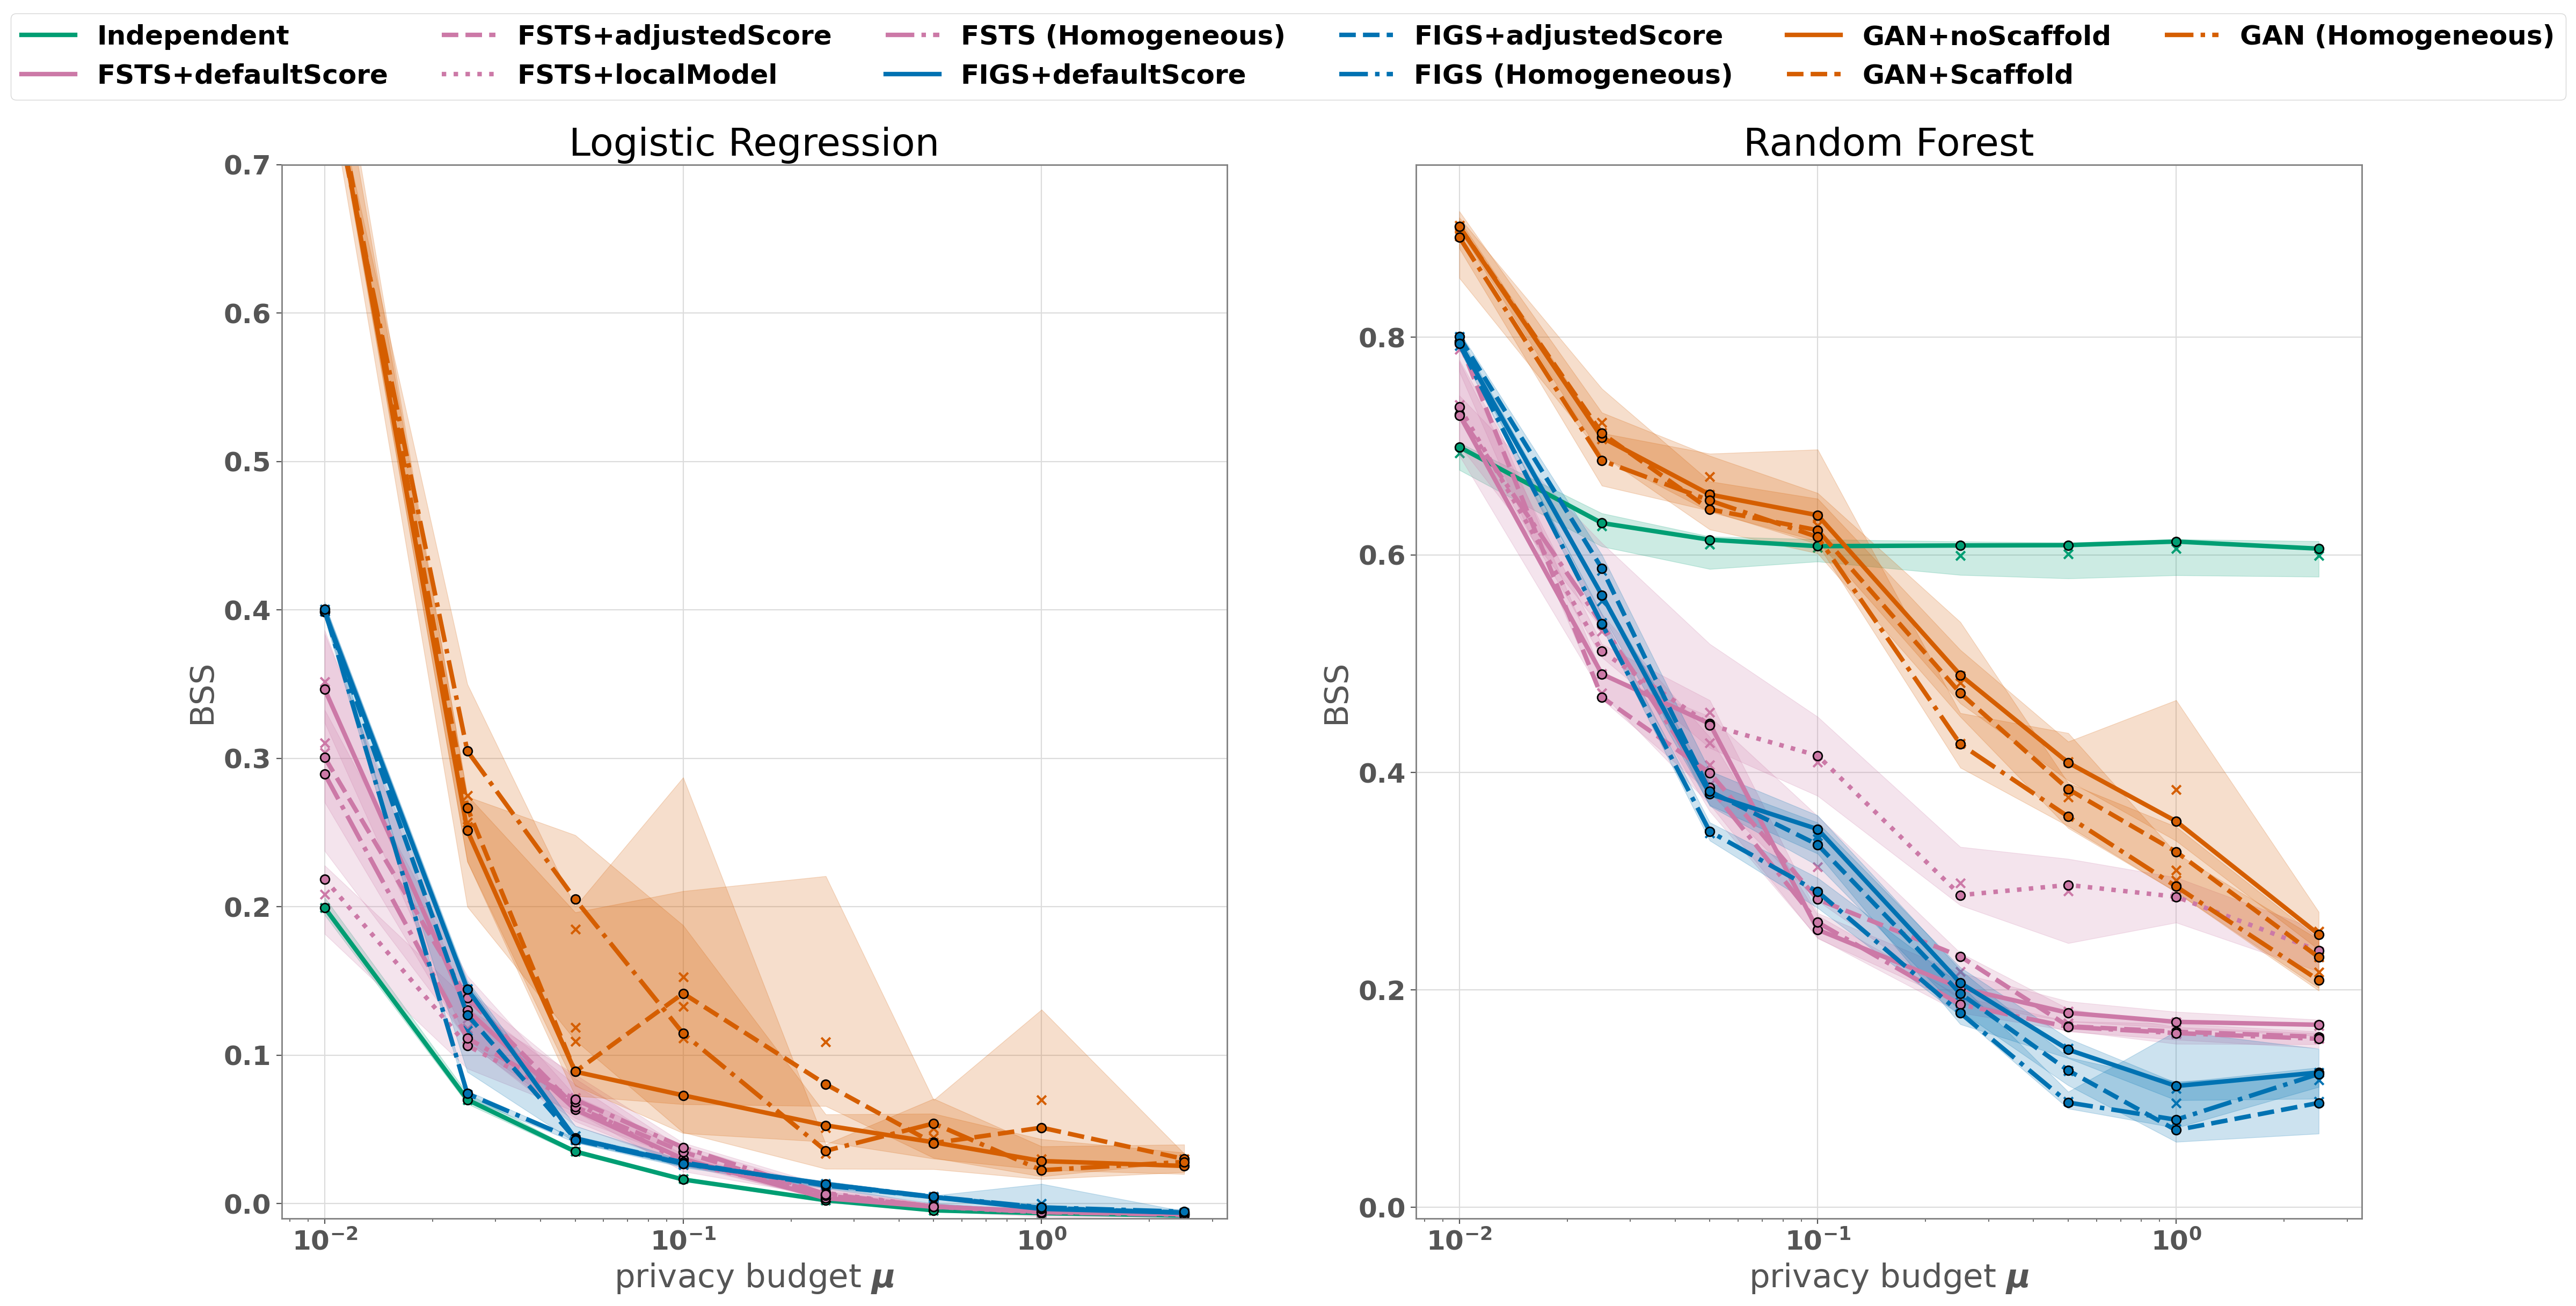

In [ ]:
#define plot
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize = (25,13), dpi = 200)
ax1, ax2= axes.flatten()

#set types
lColors = ["#009E73", "#CC79A7", "#CC79A7","#CC79A7", "#CC79A7","#0072B2","#0072B2","#0072B2","#D55E00","#D55E00","#D55E00","#000000"]
lLineStyles = ["-", "-", "--", ":", "-.", "-", "--", "-.",  "-", "--", "-.", "-"]#["-", "-", "--","-.","-","--","-.","-","-.","-", "-", "-"]

#first plot
for key, mResults in diLRRes.items():
    mResults = mResults
    if key == 11:
        continue
    ax1.scatter(vMu, mResults[:,0], marker = "x", color = lColors[key])
    ax1.plot(vMu, mResults[:,1], marker = 'o',
          linestyle = lLineStyles[key],
          color = lColors[key],
          markerfacecolor=lColors[key],
          markeredgecolor='k',
          linewidth = 3)
    ax1.fill_between(vMu, mResults[:,2], mResults[:,3],color = lColors[key],  alpha = 0.2)
#ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel('privacy budget $\mu$')
ax1.set_ylabel("MBSS")
ax1.set_ylim(bottom=-0.01)
ax1.set_ylim(top=0.70)
ax1.set_title("Logistic Regression")

#second plot
diRFRes[10][1,0:4] = np.array([0.673, 0.654, 0.632, 0.678])
diRFRes[10][2,0:4] = np.array([0.64, 0.619, 0.61, 0.66])
diRFRes[10][1:4,:] = diRFRes[10][1:4,:] *1.05

diRFRes[9][6, 0:4] = np.array([0.31, 0.327, 0.29, 0.35])
diRFRes[9][7, 0:4] = np.array([0.23, 0.23, 0.2018, 0.2471])

diRFRes[8][6:8, :] = diRFRes[8][6:8, :] *1.15
diRFRes[8][4:6, :] = diRFRes[8][4:6, :] *1.06

diRFRes[5][3:8, :] = diRFRes[5][3:8, :] *1.05
diRFRes[5][6:8, :] = diRFRes[5][6:8, :] *1.03
diRFRes[6][3:5, :] = diRFRes[6][3:5, :] *0.97
for key, mResults in diRFRes.items():
    if key == 11:
        continue
    ax2.scatter(vMu, mResults[:,0], marker = "x", color = lColors[key])
    ax2.plot(vMu, mResults[:,1], marker = 'o',
          linestyle = lLineStyles[key],
          color = lColors[key],
          markerfacecolor=lColors[key],
          markeredgecolor='k',
          linewidth = 3)
    ax2.fill_between(vMu, mResults[:,2], mResults[:,3], color = lColors[key], alpha = 0.2)
#ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_title('Random Forest')
ax2.set_xlabel('privacy budget $\mu$')
ax2.set_ylabel("MBSS")
#ax2.set_ylim(top=0.35)
ax2.set_ylim(bottom=-0.01)


#set legend
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=l) for c, l in zip(lColors, lLineStyles)]
labels = ['Independent', 'FSTS+defaultScore', 'FSTS+adjustedScore', "FSTS+localModel", "FSTS (Homogeneous)","FIGS+defaultScore", "FIGS+adjustedScore", "FIGS (Homogeneous)","GAN+noScaffold", "GAN+Scaffold","GAN (Homogeneous)"]
fig.legend(lines, labels, loc = "upper center", ncol = 6, fancybox = True, fontsize = 18)


plt.savefig('C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian/figures/hee_discriminator_results_adult.pdf', bbox_inches='tight')